Prerequisites

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from matplotlib.patches import Arc
import seaborn as sns
import numpy as np
import json

Reading the data and doing some analysis

In [ ]:
df_adv_stats = pd.read_csv('/content/Superliga_Teams_24_25_adv_stats.csv')
df_event = pd.read_csv('/content/Dinamo_Bucuresti_2024_2025_events.csv')

In [ ]:
df_adv_stats.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
team.name,teamId,competitionId,seasonId,total.matches,total.goals,total.assists,total.shots,total.headShots,total.yellowCards,total.redCards,total.directRedCards,total.penalties,total.linkupPlays,total.cleanSheets,total.duels,total.duelsWon,total.defensiveDuels,total.defensiveDuelsWon,total.offensiveDuels,total.offensiveDuelsWon,total.aerialDuels,total.aerialDuelsWon,total.fouls,total.offsides,total.passes,total.successfulPasses,total.smartPasses,total.successfulSmartPasses,total.passesToFinalThird,total.successfulPassesToFinalThird,total.crosses,total.successfulCrosses,total.forwardPasses,total.successfulForwardPasses,total.backPasses,total.successfulBackPasses,total.throughPasses,total.successfulThroughPasses,total.keyPasses,total.successfulKeyPasses,total.verticalPasses,total.successfulVerticalPasses,total.longPasses,total.successfulLongPasses,total.dribbles,total.successfulDribbles,total.interceptions,total.defensiveActions,total.successfulDefensiveActions,total.attackingActions,total.successfulAttackingActions,total.freeKicks,total.freeKicksOnTarget,total.directFreeKicks,total.directFreeKicksOnTarget,total.corners,total.successfulPenalties,total.successfulLinkupPlays,total.accelerations,total.pressingDuels,total.pressingDuelsWon,total.looseBallDuels,total.looseBallDuelsWon,total.missedBalls,total.shotAssists,total.shotOnTargetAssists,total.recoveries,total.opponentHalfRecoveries,total.dangerousOpponentHalfRecoveries,total.losses,total.ownHalfLosses,total.dangerousOwnHalfLosses,total.fieldAerialDuels,total.fieldAerialDuelsWon,total.gkExits,total.gkSuccessfulExits,total.gkAerialDuels,total.gkAerialDuelsWon,total.gkSaves,total.xgShot,total.xgShotAgainst,total.ppda,total.receivedPass,total.touchInBox,total.progressiveRun,total.concededGoals,total.opponentOffsides,total.shotsAgainst,total.gkGoalKicks,total.gkGoalKicksSuccess,total.shortGoalKicks,total.longGoalKicks,total.matchesTagged,total.newDuelsWon,total.newDefensiveDuelsWon,total.newOffensiveDuelsWon,total.newSuccessfulDribbles,total.lateralPasses,total.successfulLateralPasses,average.possessionPercent,average.duels,average.defensiveDuels,average.offensiveDuels,average.aerialDuels,average.fouls,average.goals,average.assists,average.passes,average.smartPasses,average.passesToFinalThird,average.crosses,average.dribbles,average.shots,average.headShots,average.interceptions,average.successfulDefensiveAction,average.yellowCards,average.redCards,average.directRedCards,average.successfulAttackingActions,average.freeKicks,average.directFreeKicks,average.corners,average.penalties,average.passLength,average.longPassLength,average.dribbleDistanceFromOpponentGoal,average.accelerations,average.looseBallDuels,average.missedBalls,average.forwardPasses,average.backPasses,average.throughPasses,average.keyPasses,average.verticalPasses,average.longPasses,average.shotAssists,average.shotOnTargetAssists,average.linkupPlays,average.ballRecoveries,average.opponentHalfRecoveries,average.dangerousOpponentHalfRecoveries,average.ballLosses,average.ownHalfLosses,average.dangerousOwnHalfLosses,average.fieldAerialDuels,average.concededGoals,average.gkExits,average.gkAerialDuels,average.duelsWon,average.defensiveDuelsWon,average.offensiveDuelsWon,average.successfulPasses,average.successfulSmartPasses,average.successfulPassesToFinalThird,average.successfulCrosses,average.successfulForwardPasses,average.successfulBackPasses,average.successfulThroughPasses,average.successfulKeyPasses,average.successfulVerticalPasses,average.successfulLongPasses,average.successfulDribbles,average.defensiveActions,average.attackingActions,average.freeKicksOnTarget,average.directFreeKicksOnTarget,average.successfulPenalties,average.successfulLinkupPlays,average.looseBallDuelsWon,average.fieldAer

In [ ]:
df_adv_stats.shape

(16, 228)

In [ ]:
df_adv_stats.head()

,team.name,teamId,competitionId,seasonId,total.matches,total.goals,total.assists,total.shots,total.headShots,total.yellowCards,...,percent.gkSaves,percent.gkSuccessfulExits,percent.gkAerialDuelsWon,percent.successfulTouchInBox,percent.newDuelsWon,percent.newDefensiveDuelsWon,percent.newOffensiveDuelsWon,percent.newSuccessfulDribbles,percent.successfulLateralPasses,roundId
0,Dinamo Bucureşti,11564,719,190857,39,50,24,422,53,89,...,0,0,76.92,38.91,48.90,64.81,35.32,54.03,89.58,NaN
1,FCS Bucureşti,11565,719,190857,39,60,34,553,76,90,...,0,0,77.78,40.00,47.79,64.27,36.02,50.11,89.26,NaN
2,Rapid Bucureşti,11566,719,190857,38,44,26,455,57,80,...,0,0,93.33,39.97,47.68,63.21,37.81,53.16,87.26,NaN
3,Oţelul,11571,719,190857,39,37,18,407,88,76,...,0,0,90.91,34.02,48.53,64.83,36.94,52.32,83.95,NaN
4,CFR Cluj,11611,719,190857,38,68,43,481,81,78,...,0,0,92.31,43.77,48.99,64.52,39.07,58.75,84.38,NaN


In [ ]:
df_adv_stats.tail()

,team.name,teamId,competitionId,seasonId,total.matches,total.goals,total.assists,total.shots,total.headShots,total.yellowCards,...,percent.gkSaves,percent.gkSuccessfulExits,percent.gkAerialDuelsWon,percent.successfulTouchInBox,percent.newDuelsWon,percent.newDefensiveDuelsWon,percent.newOffensiveDuelsWon,percent.newSuccessfulDribbles,percent.successfulLateralPasses,roundId
11,Hermannstadt,55427,719,190857,39,46,28,404,56,60,...,0,0,86.96,41.35,48.70,62.47,38.77,53.45,85.88,NaN
12,Universitatea Cluj,60374,719,190857,39,53,30,451,87,100,...,0,0,77.78,39.17,46.77,64.36,33.18,52.60,88.19,NaN
13,Petrolul 52,60390,719,190857,39,39,27,409,62,82,...,0,0,100.00,37.87,48.16,63.34,36.45,56.89,85.51,NaN
14,AS FC Buzău,60392,719,190857,39,29,18,348,34,94,...,0,0,88.89,34.35,47.37,64.01,37.28,50.07,84.28,NaN
15,Farul Constanţa,61242,719,190857,39,41,25,468,55,76,...,0,0,78.26,39.74,47.11,60.89,35.05,50.06,87.19,NaN


In [ ]:
df_adv_stats.isnull().sum()

,0
team.name,0
teamId,0
competitionId,0
seasonId,0
total.matches,0
...,...
percent.newDefensiveDuelsWon,0
percent.newOffensiveDuelsWon,0
percent.newSuccessfulDribbles,0
percent.successfulLateralPasses,0


Here we notice that the 'roundId' column in the dataframe has NaN values across the board so we remove it as it is not necessary going forward with the analysis

In [ ]:
df_adv_stats_modif = df_adv_stats.drop(['roundId'], axis = 1)

The next step was to build a correlation matrix to get a better overview of the features that are in a strongly correlated in order to select a certain number of features that will help with the defensive analysis.

I have set a threshold of 0.6 as we are working with a lot of data and it can potentially capture useful information

In [ ]:
corrMatrix = df_adv_stats_modif.corr(numeric_only = True)
threshold = 0.6
correlationsMappings = defaultdict(list)

for col1 in corrMatrix:
  for col2 in corrMatrix:
    if col1 != col2 and corrMatrix[col1][col2] > threshold:
      correlationsMappings[col1].append(col2)

The project relies on data analysis, precisely defensive data analysis for each team so for the moment these are the selected features that I think are the most important (also doing a sanity check to see if there are some noisy or irrelevant values in the dataset)

In [ ]:
selectedStatsFeatures = df_adv_stats_modif[
    ['team.name', 'teamId', 'total.concededGoals', 'total.successfulDefensiveActions', 'total.losses', 'total.dangerousOwnHalfLosses', 'total.interceptions', 'total.recoveries', 'total.duels', 'total.pressingDuels', 'percent.defensiveDuelsWon', 'average.opponentOffsides']
]

for ft in selectedStatsFeatures:
   for idx, vals in enumerate(df_adv_stats_modif[ft]):
    if ft != 'team.name': assert vals >= 0, f'Invalid value on row {idx} for feature {ft}'

Normalizing the team names by removing diacrititcs so that it is easier to find them if necessary

In [ ]:
selectedStatsFeatures['team.name'] = selectedStatsFeatures['team.name'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("â","a").replace("ă","a").replace("î","i"))

/tmp/ipython-input-850644266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedStatsFeatures['team.name'] = selectedStatsFeatures['team.name'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("â","a").replace("ă","a").replace("î","i"))


Introducing 4 new metrics:
 - Team defensive error rate: It takes into account the number of goals that a team conceded and the number of total successful actions across the season: if the error is high, the team is inneficient in defense and can be forced into mistakes. On the other hand, if the error is low, the team is efficient in defense and the mistakes are very rare with them

 - Dangerous own half losses rate: This metric tells us the percentage of dangerous own half losses a team had and also, combined with the defensive error rate metric, it can be deducted a team's performance in transition: for example, if a team has a high dangerous own half loss rate and a low defensive error rate, it means that the respective team is good in transition

 - Intercept recovery rate: This metric allows us to see the percentage of ball recoveries made through interceptions only. If a team has a high intercept recovery rate, thus the team pressure needs to be taken into account by the opponent for example. Contrary, if a team has a low intercept recovery rate, the opponent can use link up plays and make them vulnerable.

 - Pressing duels intensity rate: This metric can tell us how many duels were created through pressing, giving an overview of which team is a high pressure one and which team is a laid back patient one.

In [ ]:
selectedStatsFeatures['ownHalfLossRate'] = round((selectedStatsFeatures['total.dangerousOwnHalfLosses'] / selectedStatsFeatures['total.losses']) * 100, 2)
selectedStatsFeatures['defensiveErrorRates'] = (selectedStatsFeatures['total.concededGoals'] / selectedStatsFeatures['total.successfulDefensiveActions'])
selectedStatsFeatures['interceptionRecoveryRate'] = round((selectedStatsFeatures['total.interceptions'] / selectedStatsFeatures['total.recoveries']) * 100, 2)
selectedStatsFeatures['pressingIntensityRate'] = round((selectedStatsFeatures['total.pressingDuels'] / selectedStatsFeatures['total.duels']) * 100, 2)

/tmp/ipython-input-1616940373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedStatsFeatures['ownHalfLossRate'] = round((selectedStatsFeatures['total.dangerousOwnHalfLosses'] / selectedStatsFeatures['total.losses']) * 100, 2)
/tmp/ipython-input-1616940373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedStatsFeatures['defensiveErrorRates'] = (selectedStatsFeatures['total.concededGoals'] / selectedStatsFeatures['total.successfulDefensiveActions'])
/tmp/ipython-input-1616940373.py:3: Set

The next step for the moment is to try and create team profiles based on the insights and metrics obtained.

In [ ]:
def generateTeamProfiles():
  leagueAvg_ownHalf_Loss_Rate = selectedStatsFeatures['ownHalfLossRate'].mean()
  leagueAvg_Def_Errors = round(selectedStatsFeatures['defensiveErrorRates'].mean(), 2)
  leagueAvg_Interception_Recovery_Rate = selectedStatsFeatures['interceptionRecoveryRate'].mean()
  leagueAvg_Def_Duels_Won = selectedStatsFeatures['percent.defensiveDuelsWon'].mean()
  leagueAvg_Pressing_Intensity = selectedStatsFeatures['pressingIntensityRate'].mean()
  allNotes = []

  for(ownHalf_Loss_Rate, defError_Rate, def_duelsWon_Rate, intercept_Recovery_Rate, pressingIntensity_Rate) in zip(selectedStatsFeatures['ownHalfLossRate'], selectedStatsFeatures['defensiveErrorRates'], selectedStatsFeatures['percent.defensiveDuelsWon'], selectedStatsFeatures['interceptionRecoveryRate'], selectedStatsFeatures['pressingIntensityRate']):
    team_profile_notes = []

    if defError_Rate > leagueAvg_Def_Errors:
      team_profile_notes.append("This team concedes goals in spite of their succesful defensive actions. It can be attempted to force them to make mistakes" + '\n')

    else:
      team_profile_notes.append(f"This team is not defensive error prone. They have an error rate of {defError_Rate}% and mistakes are rare with them" + '\n')

    if ownHalf_Loss_Rate > leagueAvg_ownHalf_Loss_Rate:
      team_profile_notes.append(f"This team tends to lose the ball frequently in its own half, with a loss percentage of {ownHalf_Loss_Rate}% which is above the league average" + '\n')

    else:
      team_profile_notes.append(f"This team does not lose the ball that often in its own half, with a loss percentage of {ownHalf_Loss_Rate}%, proving that the team has a high control in its own half" + '\n')

    if def_duelsWon_Rate > leagueAvg_Def_Duels_Won:
      team_profile_notes.append(f"This team is very good in 1 on 1 defensive situations, with a {def_duelsWon_Rate}% of won duels" + '\n')

    else:
      team_profile_notes.append(f"This team is below the league average on 1 on 1 defensive situations, they can be vulnerable there" + '\n')

    if intercept_Recovery_Rate > leagueAvg_Interception_Recovery_Rate:
      team_profile_notes.append("This team performs well when recovering the posssesion by interceptions" + '\n')

    else:
      team_profile_notes.append(f"This team is below the league average when recovering the posssesion by interceptions, with {intercept_Recovery_Rate}%. They can be vulnerable against successful link up plays" + '\n')

    if pressingIntensity_Rate > leagueAvg_Pressing_Intensity:
      team_profile_notes.append(f"This team is a high pressing one. Watch out for their intensity and try to not lose the ball. Try to force them into a mistake and catch them off guard" + '\n')

    else:
      team_profile_notes.append(f"This team is a laid back one in terms of pressing. They will be patient when recovering the ball" + '\n')

    allNotes.append(" ,".join(team_profile_notes))

  selectedStatsFeatures['teamProfile'] = allNotes

In [ ]:
generateTeamProfiles()

/tmp/ipython-input-3976788035.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedStatsFeatures['teamProfile'] = allNotes


In [ ]:
selectedStatsFeatures.to_csv('Team_DefenseMetrics_Profiles.csv', index = False)

Defining a plotting method in order to get a first visualization of our obtained results

In [ ]:
def plotTeamsData(teams, plottingValues, plotTitle, yLabel):
    plt.figure(figsize=(10, 5))
    plt.bar(teams, plottingValues, color='blue', width=0.5)
    plt.xticks(rotation=55, ha='right', fontsize=10)
    plt.title(plotTitle)
    plt.ylabel(yLabel)
    plt.tight_layout()
    plt.show()

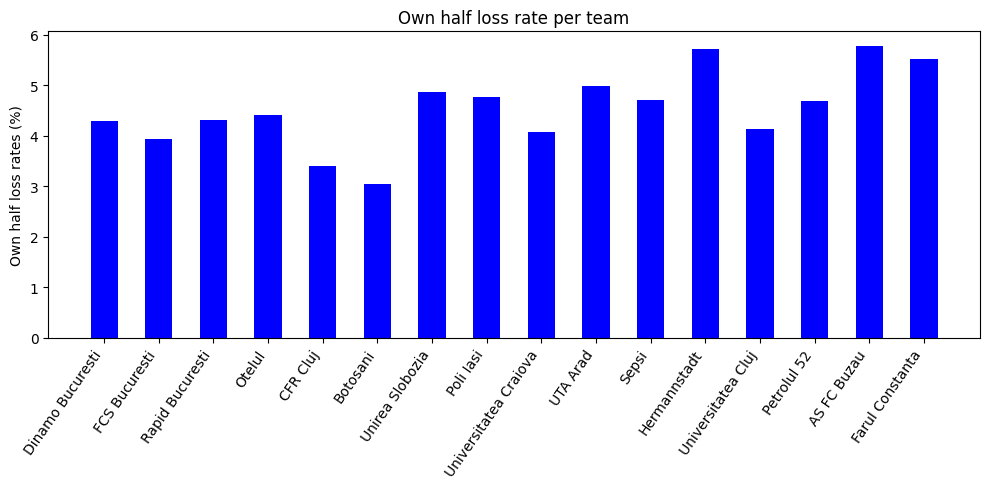

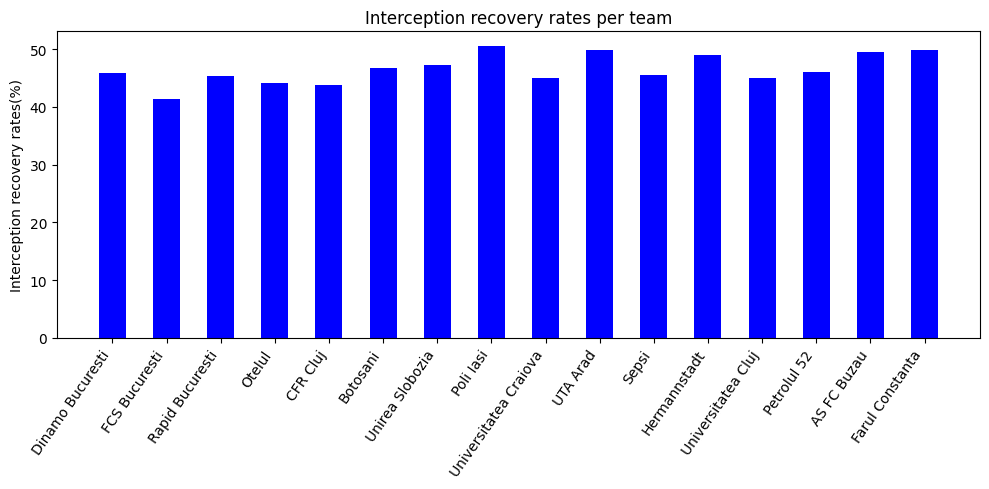

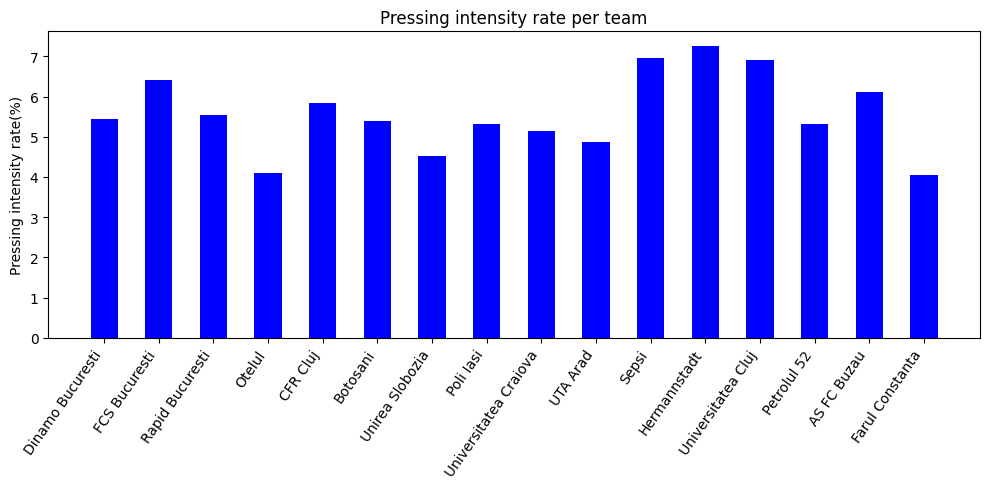

In [ ]:
teams = selectedStatsFeatures['team.name']
plotTeamsData(teams, selectedStatsFeatures['ownHalfLossRate'], 'Own half loss rate per team', 'Own half loss rates (%)')
plotTeamsData(teams, selectedStatsFeatures['interceptionRecoveryRate'], 'Interception recovery rates per team', 'Interception recovery rates(%)')
plotTeamsData(teams, selectedStatsFeatures['pressingIntensityRate'], 'Pressing intensity rate per team', 'Pressing intensity rate(%)')

Now, let's also look at the event data for the team Dinamo Bucuresti and try to observe the defense plays.

In [ ]:
df_event.shape

(65683, 74)

In [ ]:
df_event.head()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type.primary,type.secondary,...,label,date,dateutc,status,competitionId,seasonId,roundId,gameweek,points,Home_Away
0,2555188734,5695561,1H,0,0,00:00:00.740,1.740425,2.555189e+09,pass,"['back_pass', 'short_or_medium_pass']",...,"Universitatea Craiova - Dinamo Bucureşti, 2-1",2025-05-24 20:00:00,2025-05-24 18:00:00,Played,719,190857,4434474,10,0,Away
1,2555188735,5695561,1H,0,1,00:00:01.539,2.539806,2.555189e+09,pass,['short_or_medium_pass'],...,"Universitatea Craiova - Dinamo Bucureşti, 2-1",2025-05-24 20:00:00,2025-05-24 18:00:00,Played,719,190857,4434474,10,0,Away
2,2555188737,5695561,1H,0,2,00:00:02.804,3.804978,2.555189e+09,pass,"['back_pass', 'short_or_medium_pass']",...,"Universitatea Craiova - Dinamo Bucureşti, 2-1",2025-05-24 20:00:00,2025-05-24 18:00:00,Played,719,190857,4434474,10,0,Away
3,2555188736,5695561,1H,0,5,00:00:05.464,6.464117,2.555189e+09,pass,"['lateral_pass', 'short_or_medium_pass']",...,"Universitatea Craiova - Dinamo Bucureşti, 2-1",2025-05-24 20:00:00,2025-05-24 18:00:00,Played,719,190857,4434474,10,0,Away
4,2555188733,5695561,1H,0,9,00:00:09.404,10.404228,2.555189e+09,pass,"['lateral_pass', 'short_or_medium_pass']",...,"Universitatea Craiova - Dinamo Bucureşti, 2-1",2025-05-24 20:00:00,2025-05-24 18:00:00,Played,719,190857,4434474,10,0,Away


In [ ]:
df_event.tail()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type.primary,type.secondary,...,label,date,dateutc,status,competitionId,seasonId,roundId,gameweek,points,Home_Away
65678,2238524906,5597521,2H,97,30,01:37:30.464,6176.464700,2.238525e+09,infraction,['foul'],...,"CFR Cluj - Dinamo Bucureşti, 3-2",2024-07-14 18:00:00,2024-07-14 16:00:00,Played,719,190857,4432540,1,0,Away
65679,2238525037,5597521,2H,98,1,01:38:01.904,6207.904796,2.238525e+09,free_kick,[],...,"CFR Cluj - Dinamo Bucureşti, 3-2",2024-07-14 18:00:00,2024-07-14 16:00:00,Played,719,190857,4432540,1,0,Away
65680,2238525038,5597521,2H,98,5,01:38:05.516,6211.516197,2.238525e+09,duel,"['aerial_duel', 'loss']",...,"CFR Cluj - Dinamo Bucureşti, 3-2",2024-07-14 18:00:00,2024-07-14 16:00:00,Played,719,190857,4432540,1,0,Away
65681,2238524907,5597521,2H,98,5,01:38:05.570,6211.570301,2.238525e+09,duel,"['aerial_duel', 'loss', 'recovery', 'counterpr...",...,"CFR Cluj - Dinamo Bucureşti, 3-2",2024-07-14 18:00:00,2024-07-14 16:00:00,Played,719,190857,4432540,1,0,Away
65682,2238525039,5597521,2H,98,9,01:38:09.692,6215.692039,NaN,pass,"['progressive_pass', 'short_or_medium_pass']",...,"CFR Cluj - Dinamo Bucureşti, 3-2",2024-07-14 18:00:00,2024-07-14 16:00:00,Played,719,190857,4432540,1,0,Away


Knowing that this project is focused on analyzing the defensive phase of the match, we filter the dataframe so that all the events are centralized around Dinamo Bucuresti's defensive moments. As a result, the dataframe is filtered by the opponent team name to be "Dinamo Bucuresti"

Afterwards, in the same manner as the advanced stats dataframe feature selection, we have selected a number of features that would be helpful in the event data analysis.

In [ ]:
oppPlaysFilter = df_event['opponentTeam.name'] == "Dinamo Bucureşti"

filteredEventDf = df_event[oppPlaysFilter]
selectedEventFeatures = filteredEventDf[
    ['id', 'matchId', 'type.primary', 'type.secondary', 'location.x', 'location.y', 'player.name', 'team.name', 'label', 'points']
]

selectedEventFeatures

,id,matchId,type.primary,type.secondary,location.x,location.y,player.name,team.name,label,points
8,2555189521,5695561,duel,"['defensive_duel', 'ground_duel', 'recovery']",58.0,83.0,V. Mogoș,Universitatea Craiova,"Universitatea Craiova - Dinamo Bucureşti, 2-1",0
9,2555189522,5695561,pass,"['back_pass', 'short_or_medium_pass']",70.0,89.0,Ş. Baiaram,Universitatea Craiova,"Universitatea Craiova - Dinamo Bucureşti, 2-1",0
10,2555189523,5695561,pass,"['lateral_pass', 'short_or_medium_pass']",37.0,81.0,V. Mogoș,Universitatea Craiova,"Universitatea Craiova - Dinamo Bucureşti, 2-1",0
11,2555189524,5695561,pass,['short_or_medium_pass'],35.0,59.0,V. Screciu,Universitatea Craiova,"Universitatea Craiova - Dinamo Bucureşti, 2-1",0
12,2555189525,5695561,pass,['short_or_medium_pass'],38.0,44.0,A. Mekvabishvili,Universitatea Craiova,"Universitatea Craiova - Dinamo Bucureşti, 2-1",0
...,...,...,...,...,...,...,...,...,...,...
65674,2238525035,5597521,duel,"['aerial_duel', 'recovery', 'counterpressing_r...",48.0,29.0,M. Korenica,CFR Cluj,"CFR Cluj - Dinamo Bucureşti, 3-2",0
65676,2238525036,5597521,duel,"['defensive_duel', 'foul_suffered', 'ground_du...",46.0,14.0,M. Korenica,CFR Cluj,"CFR Cluj - Dinamo Bucureşti, 3-2",0
65679,2238525037,5597521,free_kick,[],53.0,11.0,M. Ilie,CFR Cluj,"CFR Cluj - Dinamo Bucureşti, 3-2",0
65680,2238525038,5597521,duel,"['aerial_duel', 'loss']",78.0,82.0,P. Tachtsidis,CFR Cluj,"CFR Cluj - Dinamo Bucureşti, 3-2",0


Normalizing the team names once again

In [ ]:
selectedEventFeatures['team.name'] = selectedEventFeatures['team.name'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("ă","a"))
selectedEventFeatures['label'] = selectedEventFeatures['label'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("ă","a"))

/tmp/ipython-input-2837685784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedEventFeatures['team.name'] = selectedEventFeatures['team.name'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("ă","a"))
/tmp/ipython-input-2837685784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedEventFeatures['label'] = selectedEventFeatures['label'].apply(lambda text: text.replace("ţ","t").replace("ş","s").replace("ă","a"))


Mapping each team to the match results

In [ ]:
allMatchesResultsMapping = defaultdict(list)
allTeams = set(selectedEventFeatures['team.name'])
allMatches = set(selectedEventFeatures['label'])

for team in allTeams:
  for mtch in allMatches:
    if team in mtch: allMatchesResultsMapping[team].append(mtch)

Saving this dictionary as a json file so that it can be easily used locally

In [ ]:
with open('matchResultsMappings.json', 'w') as fp:
    json.dump(allMatchesResultsMapping, fp)

Visualizing the number of points Dinamo Bucuresti has obtained against each team in the league. After visualization we find out that FCSB is Dinamo's best opponent

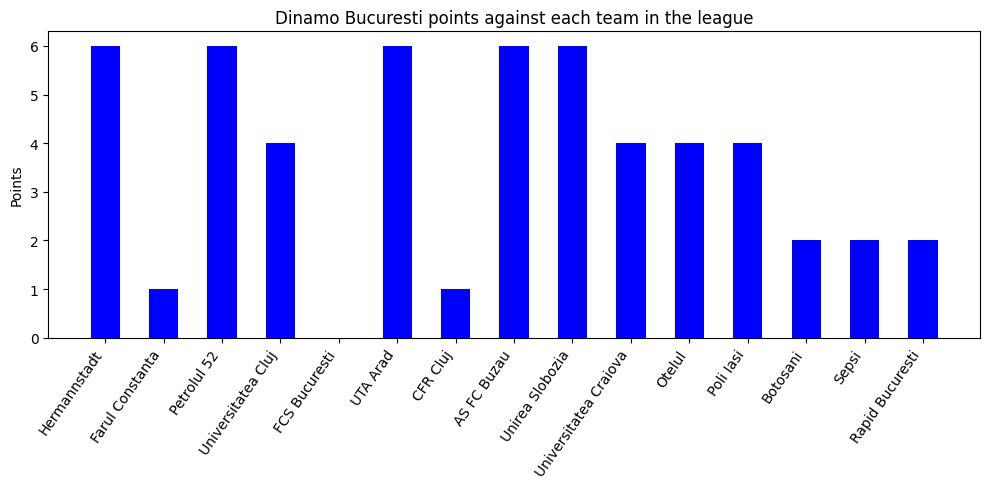

In [ ]:
allPoints = []

for results in allMatchesResultsMapping.values():
  points_Against_Current_Team = 0

  for matchResult in results:
    matchResLoc = selectedEventFeatures.loc[selectedEventFeatures['label'] == matchResult]
    points_Against_Current_Team += int(matchResLoc['points'].iloc[0])
    continue

  allPoints.append(points_Against_Current_Team)


plotTeamsData(allMatchesResultsMapping.keys(), allPoints, 'Dinamo Bucuresti points against each team in the league', 'Points')

Next, let's see the events that lead to ball turnovers and ball recoveries from each team. This helps the analysis by looking at weak areas when the ball is turned over by the opponent and strong areas when the ball is recovered

In [ ]:
def get_Turnover_Recovery_Data(matchResultData):
  for team in matchResultData:
    opponentBallTurnover_Events = {}
    opponentBallRecovery_Events = {}

    for result in matchResultData[team]:
      matchEvents = selectedEventFeatures.loc[selectedEventFeatures['label'] == result]

      for primaryEvent, secondaryEvents in zip(matchEvents['type.primary'], matchEvents['type.secondary']):
        if 'loss' in secondaryEvents:
          if primaryEvent not in opponentBallTurnover_Events: opponentBallTurnover_Events[primaryEvent] = 1
          else: opponentBallTurnover_Events[primaryEvent] += 1

        if 'loss' not in secondaryEvents and 'recovery' in secondaryEvents:
          if primaryEvent not in opponentBallRecovery_Events: opponentBallRecovery_Events[primaryEvent] = 1
          else: opponentBallRecovery_Events[primaryEvent] += 1

    plotTeamsData(opponentBallTurnover_Events.keys(), opponentBallTurnover_Events.values(), f'{team} ball turnover events against Dinamo Bucuresti across all matches played', 'Ball turnover events')
    plotTeamsData(opponentBallRecovery_Events.keys(), opponentBallRecovery_Events.values(), f'{team} ball recovery against Dinamo Bucuresti across all matches played', 'Ball recovery events')

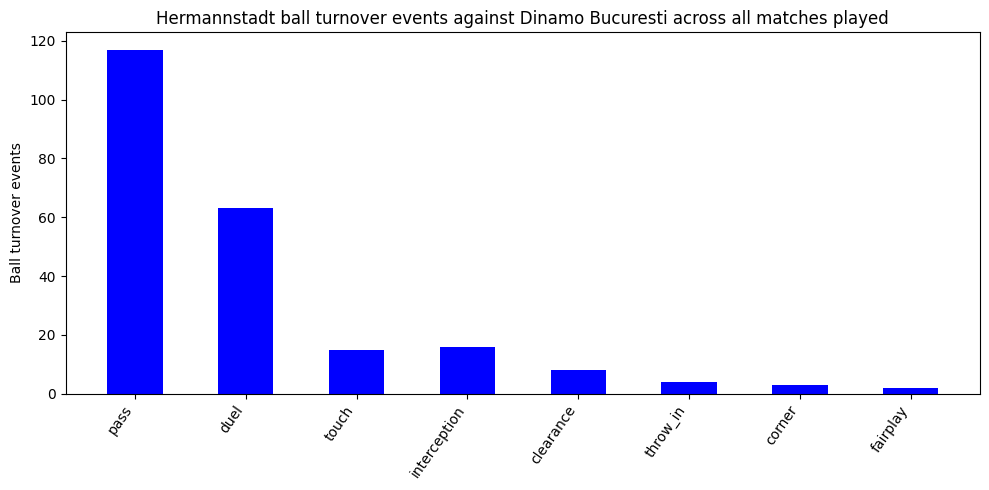

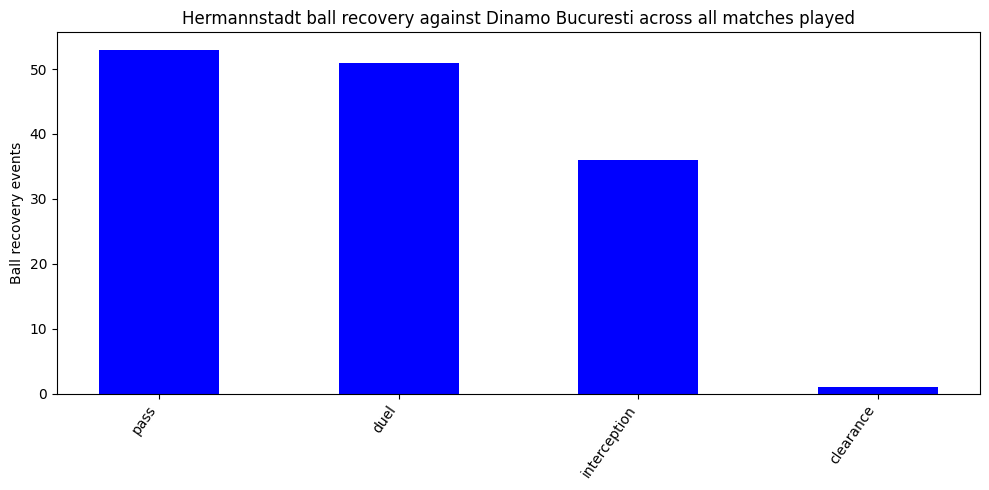

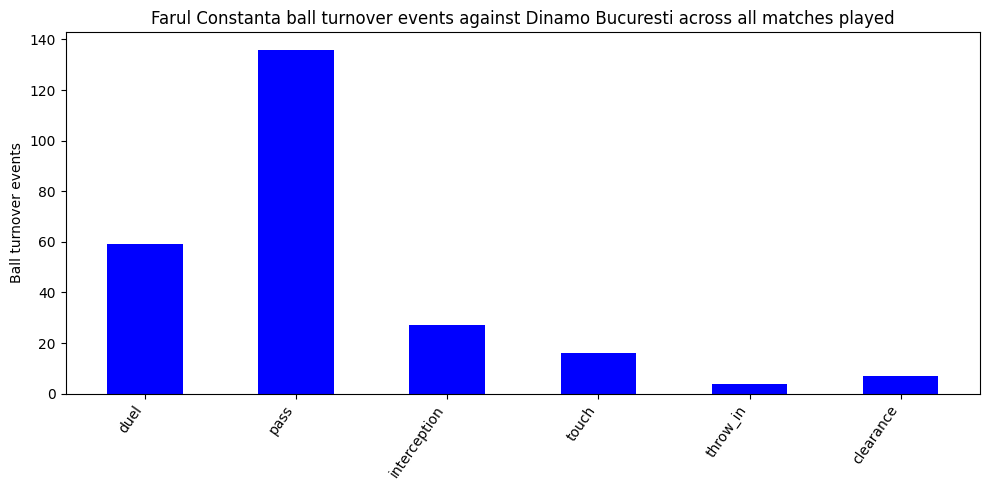

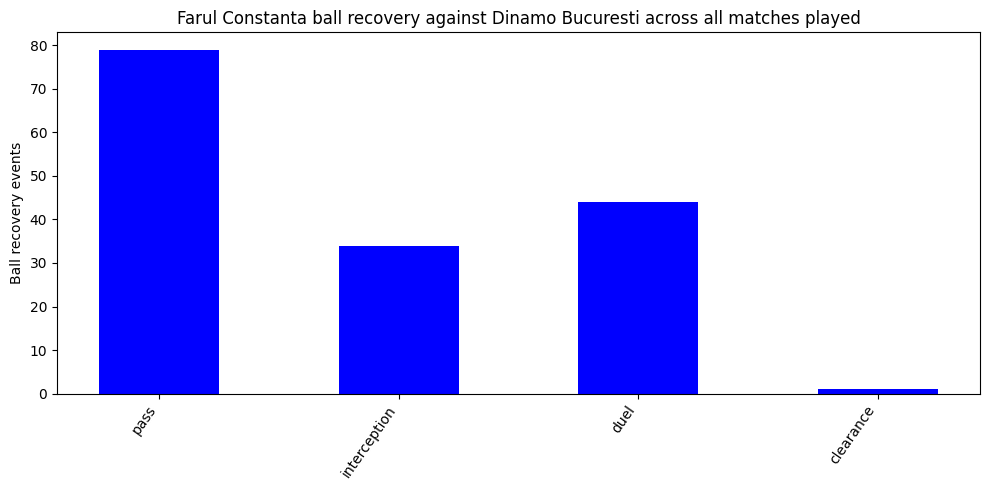

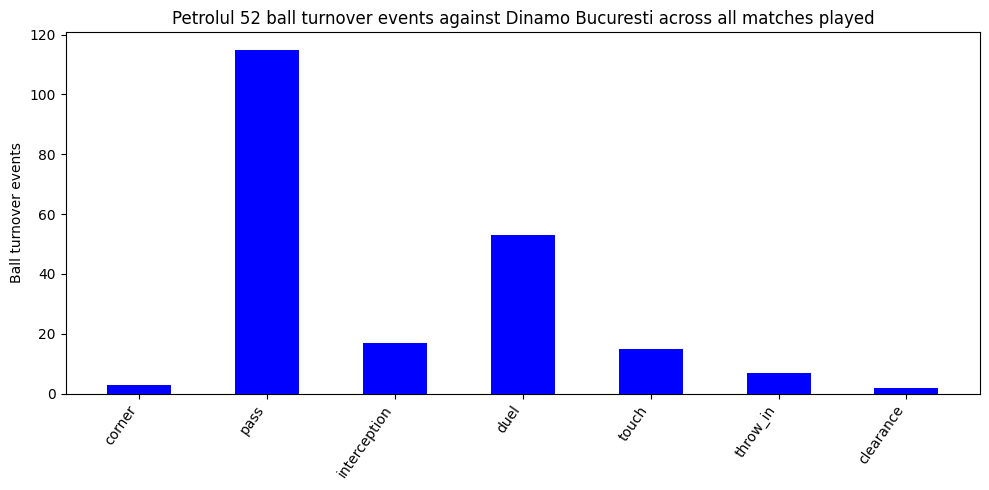

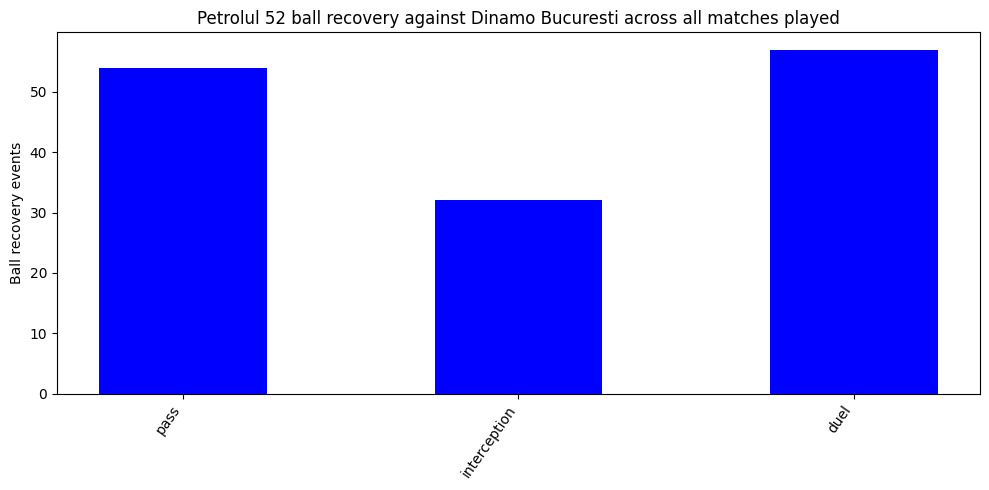

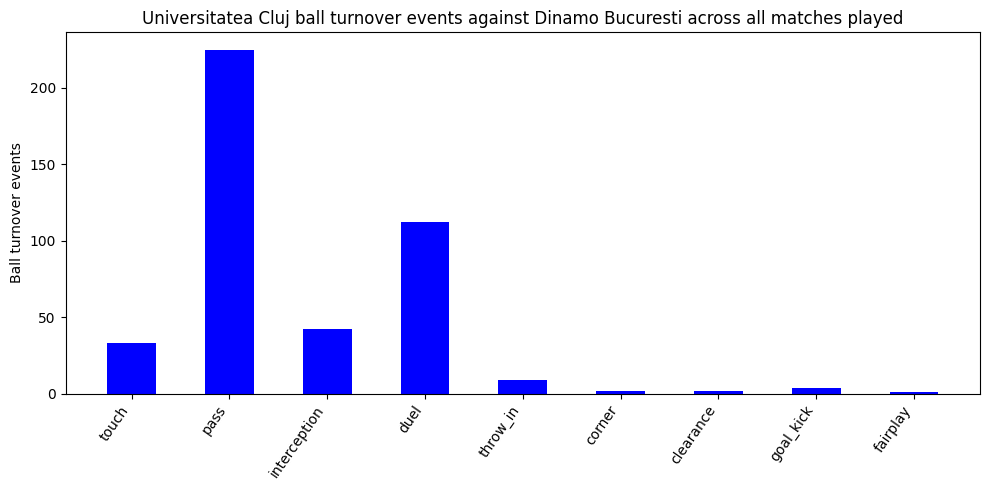

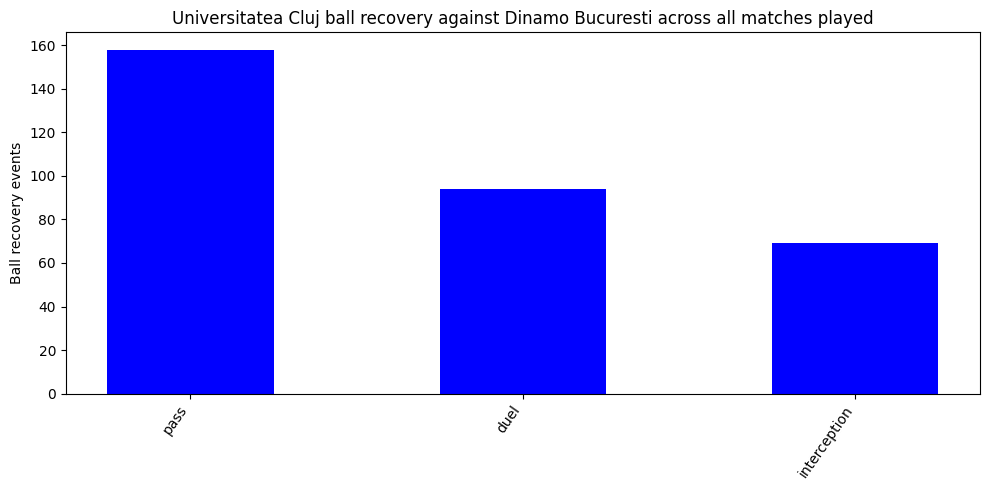

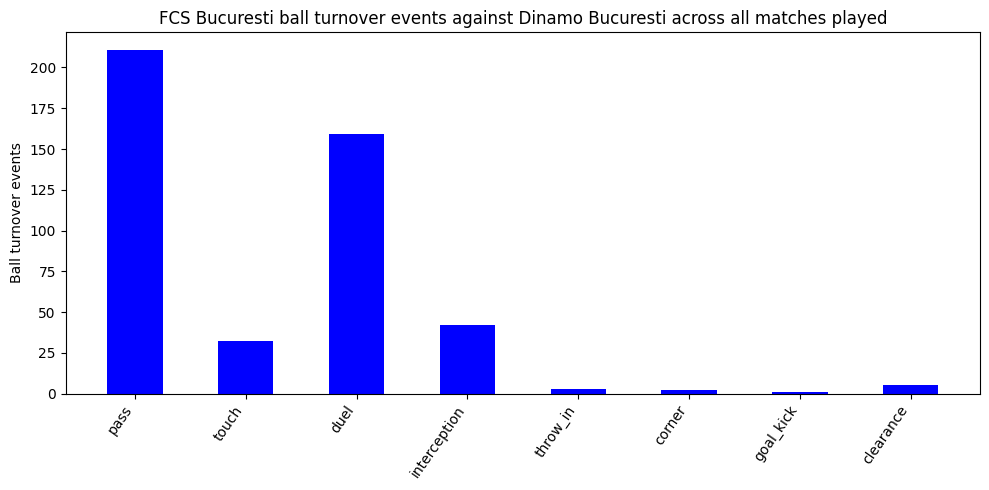

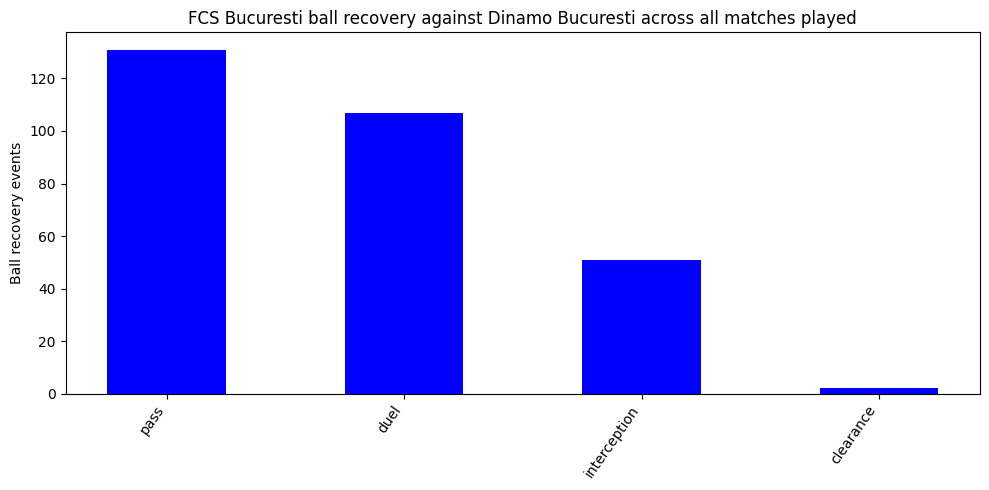

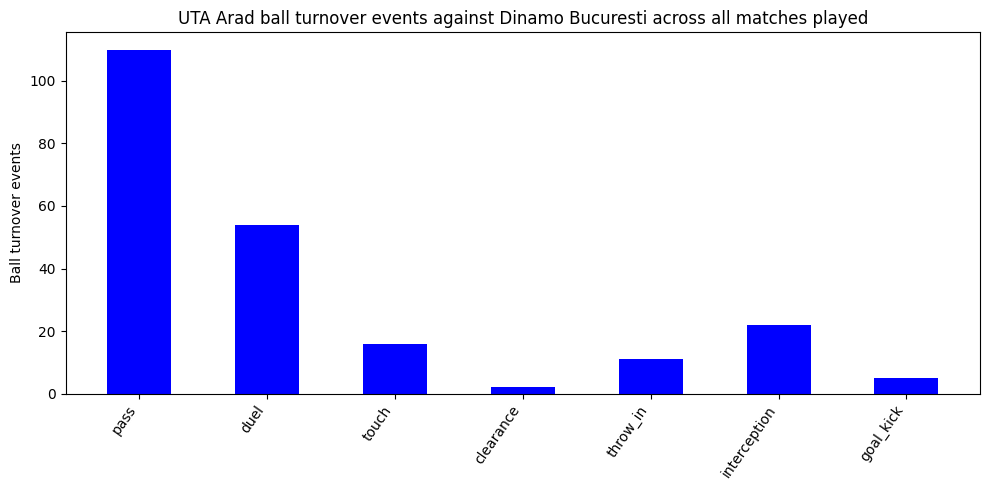

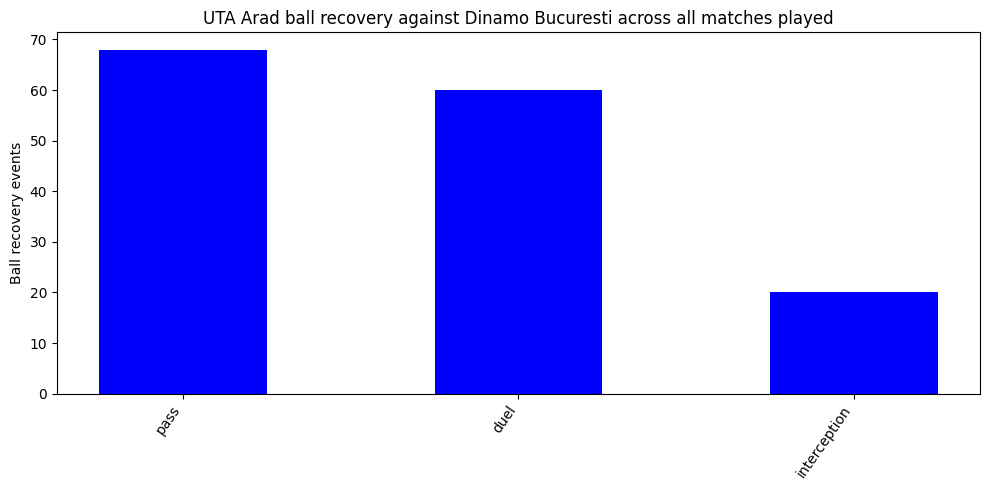

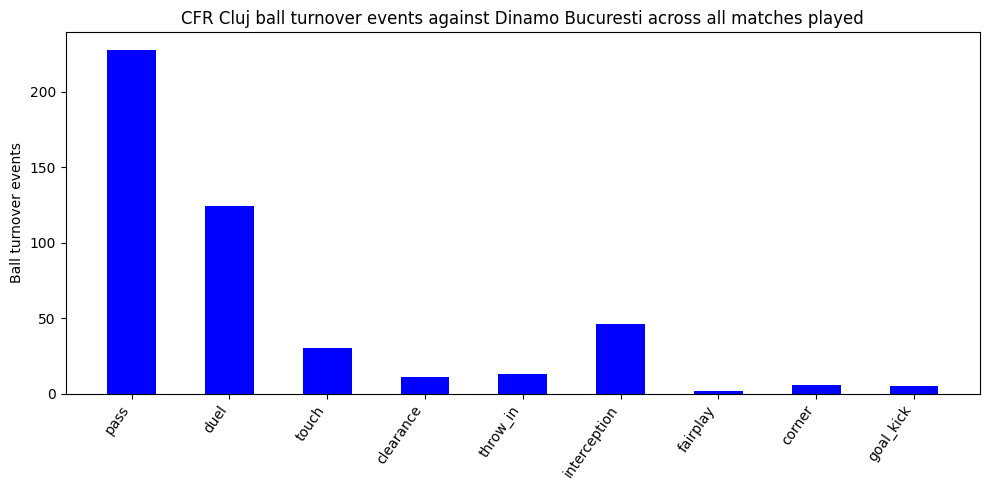

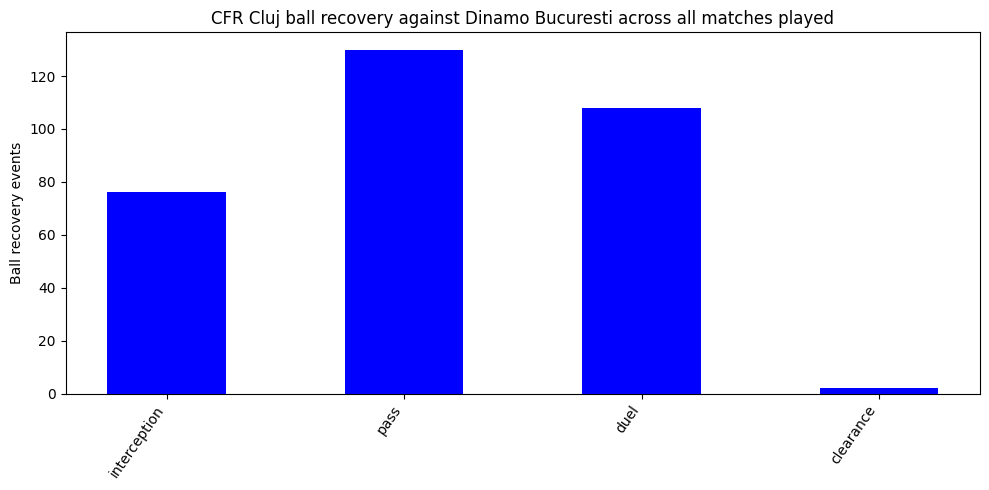

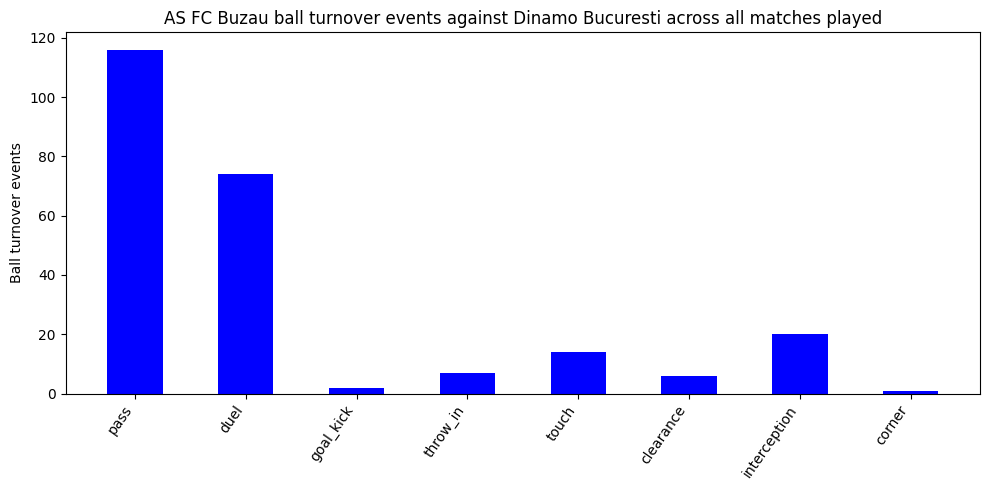

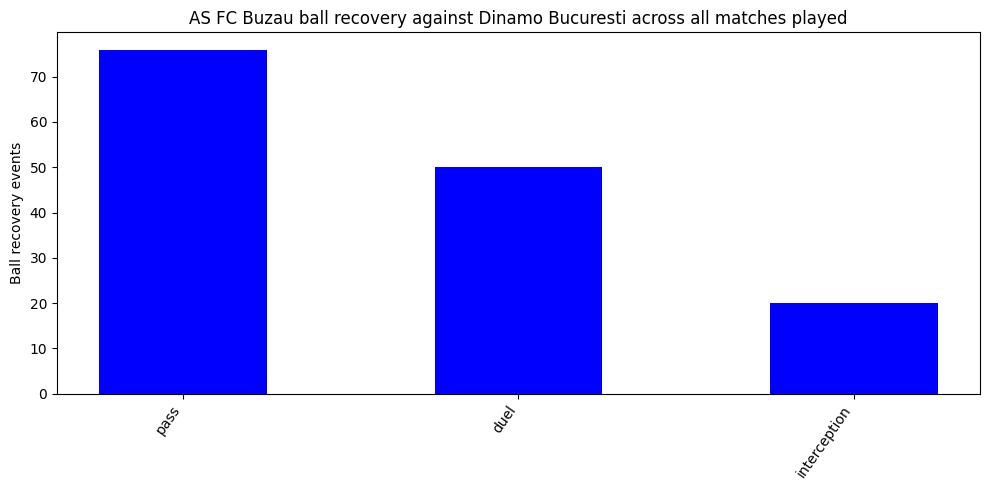

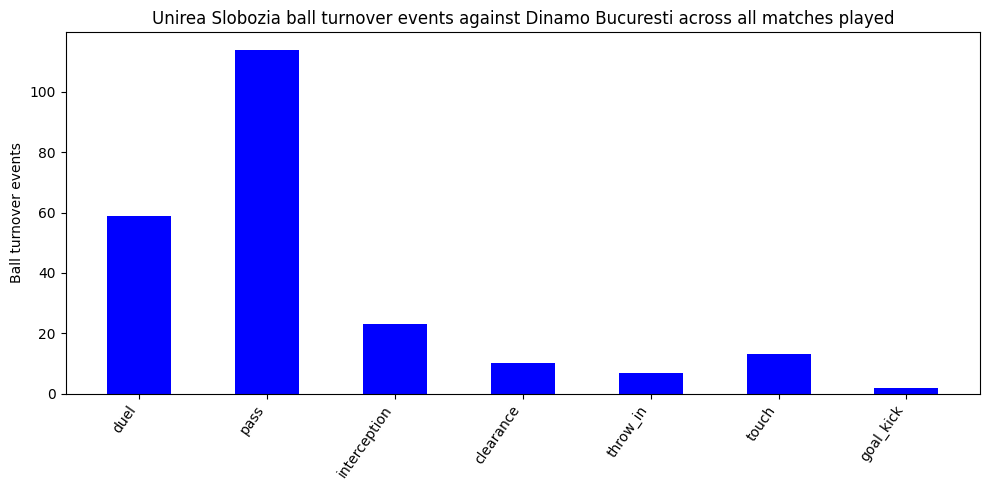

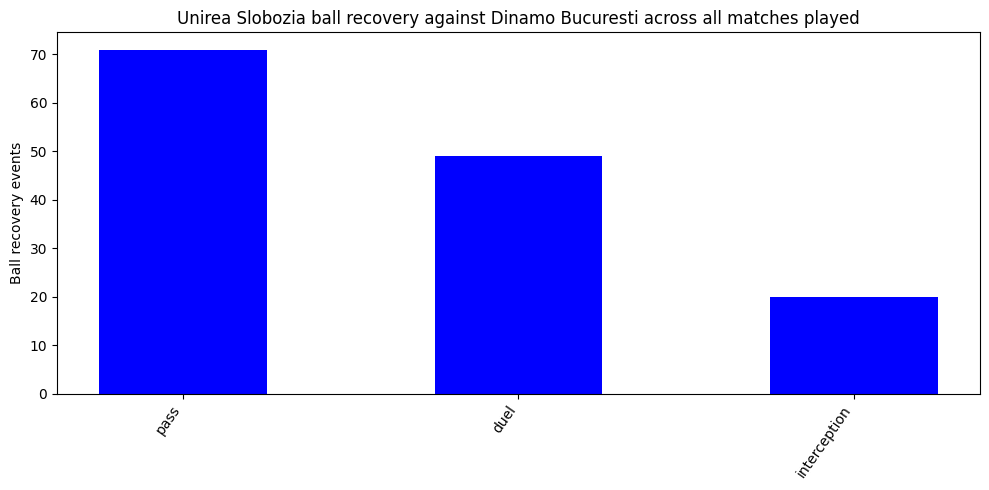

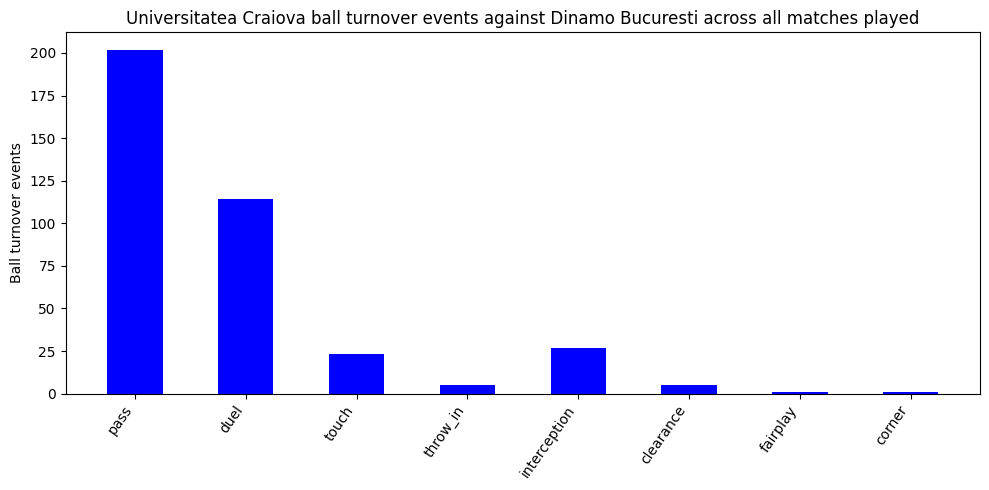

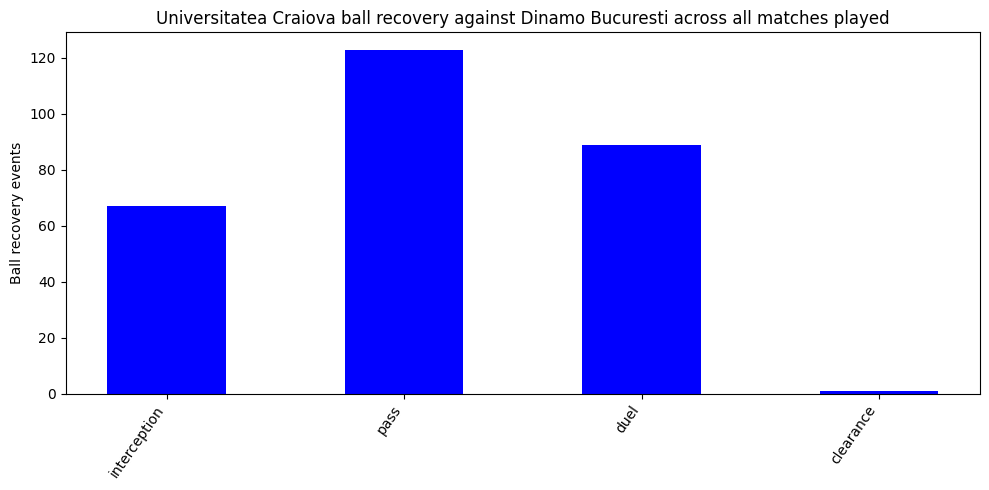

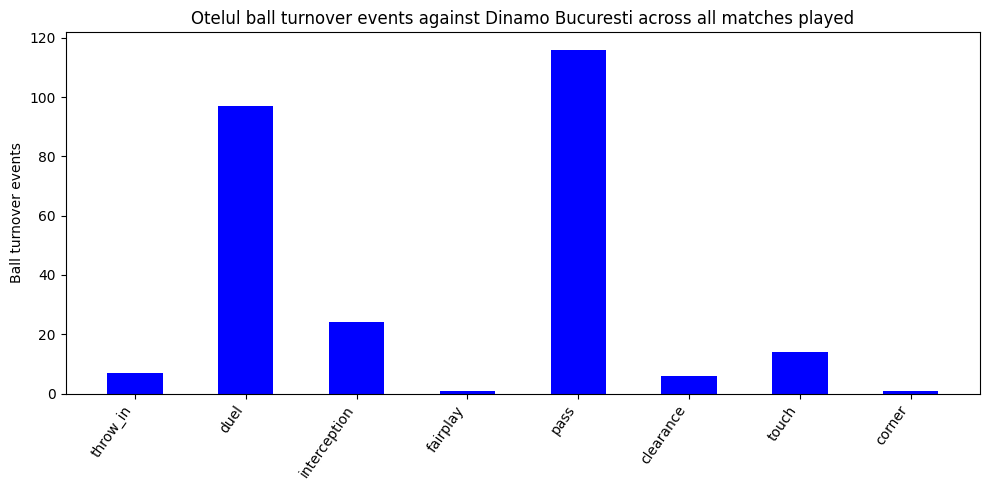

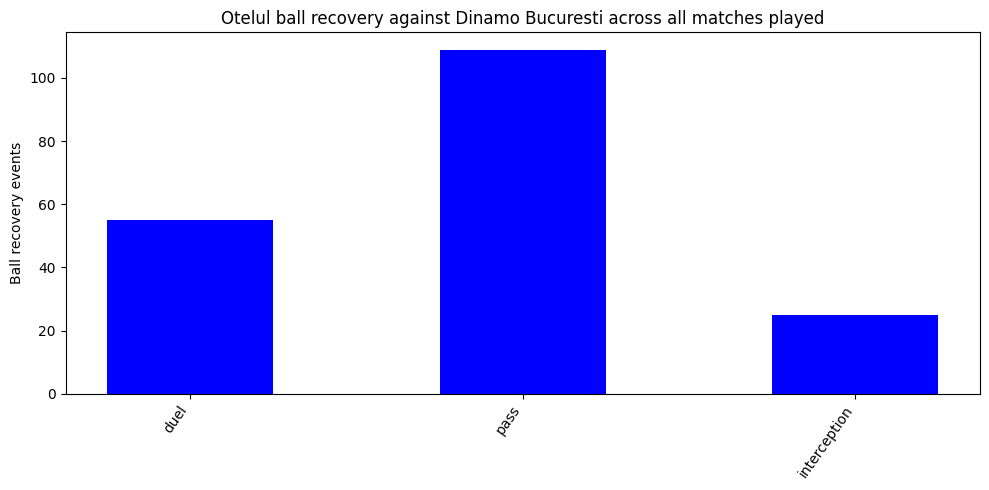

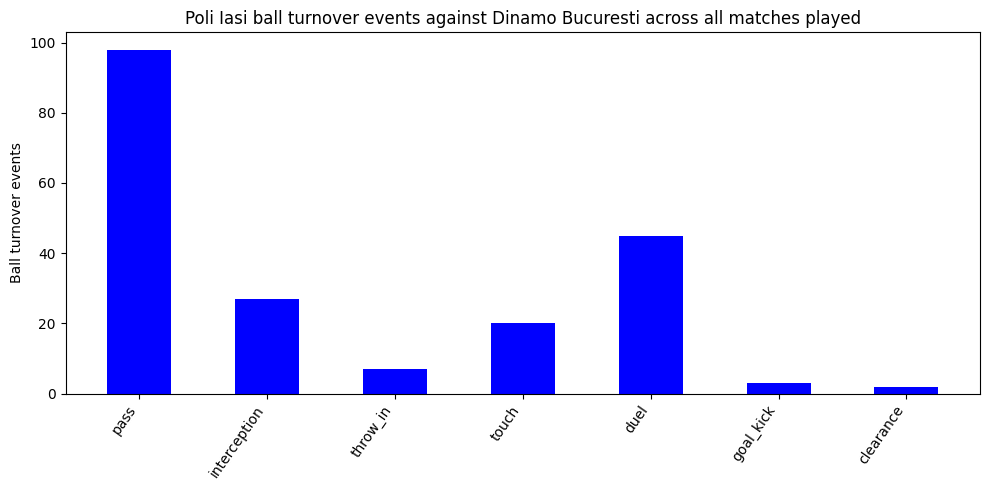

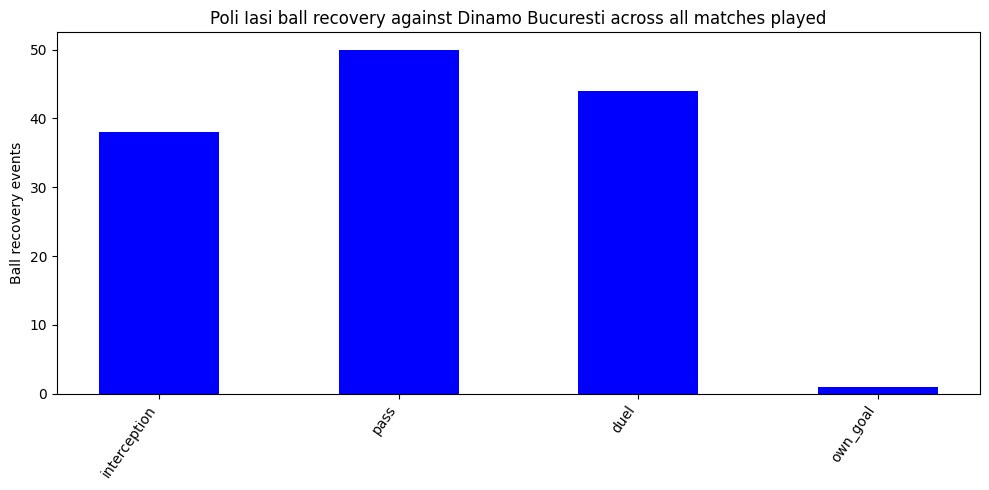

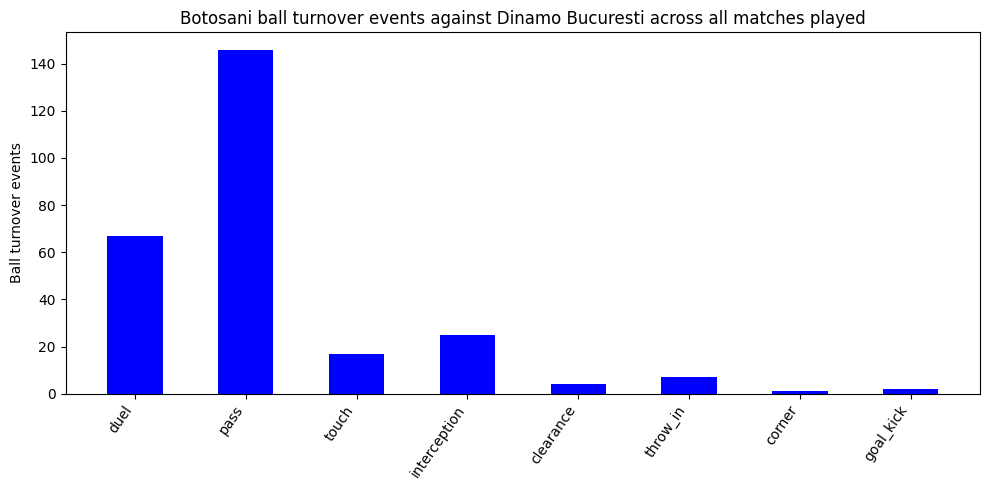

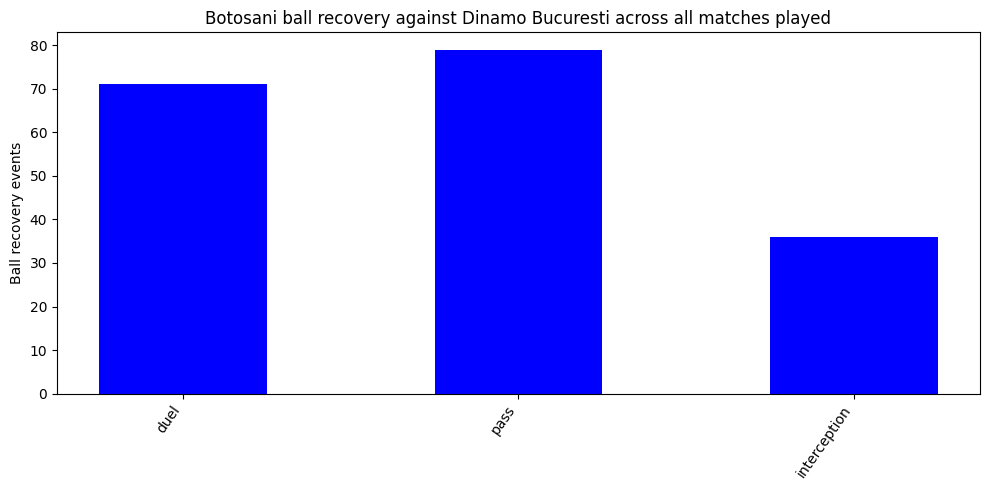

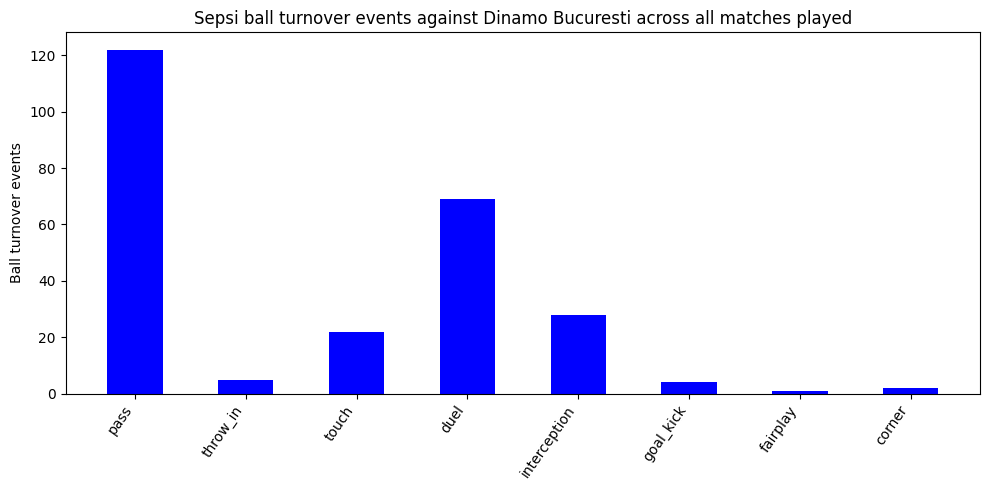

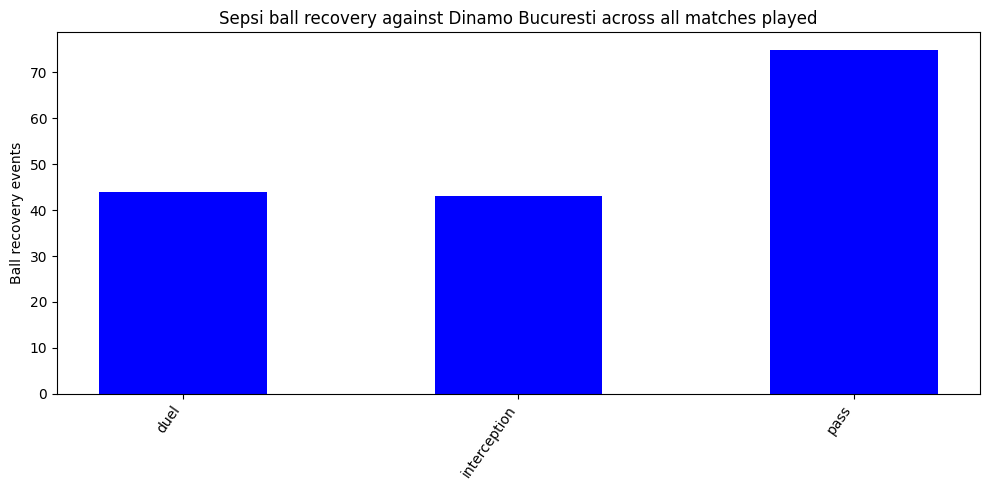

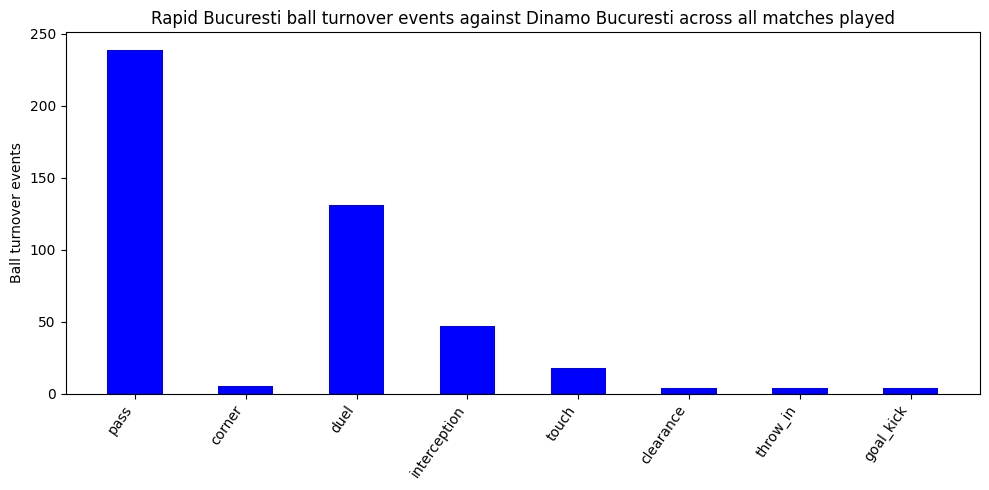

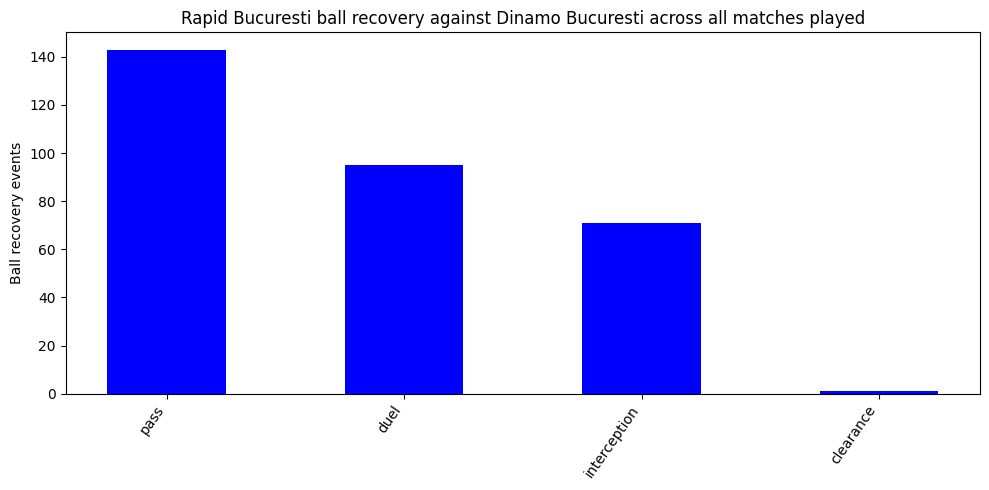

In [ ]:
get_Turnover_Recovery_Data(allMatchesResultsMapping)


To get a even better overview, a heat map of ball turnovers and ball recoveries is created for each team

In [ ]:
def get_Loss_Recovery_Coordinates(team_Name):
  team_Events = selectedEventFeatures['team.name'] == team_Name
  filtered_Events = selectedEventFeatures[team_Events][['location.x', 'location.y', 'type.secondary']]
  X_loss = []
  Y_loss = []
  X_recovery = []
  Y_recovery = []

  for loc_x, loc_y, secondaryEvents in zip(filtered_Events['location.x'], filtered_Events['location.y'], filtered_Events['type.secondary']):
    if 'loss' in secondaryEvents:
      X_loss.append(loc_x)
      Y_loss.append(loc_y)

    if 'recovery' in secondaryEvents:
      X_recovery.append(loc_x)
      Y_recovery.append(loc_y)

  return X_loss, Y_loss, X_recovery, Y_recovery


In [ ]:
def plot_Loss_Recovery_HeatMap(draw_ax):

  #Pitch Outline & Centre Line
  draw_ax.plot([0,0],[0,90], color="black")
  draw_ax.plot([0,130],[90,90], color="black")
  draw_ax.plot([130,130],[90,0], color="black")
  draw_ax.plot([130,0],[0,0], color="black")
  draw_ax.plot([65,65],[0,90], color="black")

  #Left Penalty Area
  draw_ax.plot([16.5,16.5],[65,25],color="black")
  draw_ax.plot([0,16.5],[65,65],color="black")
  draw_ax.plot([16.5,0],[25,25],color="black")

  #Right Penalty Area
  draw_ax.plot([130,113.5],[65,65],color="black")
  draw_ax.plot([113.5,113.5],[65,25],color="black")
  draw_ax.plot([113.5,130],[25,25],color="black")

  #Left 6-yard Box
  draw_ax.plot([0,5.5],[54,54],color="black")
  draw_ax.plot([5.5,5.5],[54,36],color="black")
  draw_ax.plot([5.5,0.5],[36,36],color="black")

  #Right 6-yard Box
  draw_ax.plot([130,124.5],[54,54],color="black")
  draw_ax.plot([124.5,124.5],[54,36],color="black")
  draw_ax.plot([124.5,130],[36,36],color="black")

  #Prepare Circles
  centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
  centreSpot = plt.Circle((65,45),0.8,color="black")
  leftPenSpot = plt.Circle((11,45),0.8,color="black")
  rightPenSpot = plt.Circle((119,45),0.8,color="black")

  #Draw Circles
  draw_ax.add_patch(centreCircle)
  draw_ax.add_patch(centreSpot)
  draw_ax.add_patch(leftPenSpot)
  draw_ax.add_patch(rightPenSpot)

  #Prepare Arcs
  leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
  rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

  #Draw Arcs
  draw_ax.add_patch(leftArc)
  draw_ax.add_patch(rightArc)

  #Tidy Axes
  draw_ax.axis('off')

  draw_ax.set_ylim(0, 90)
  draw_ax.set_xlim(0, 130)

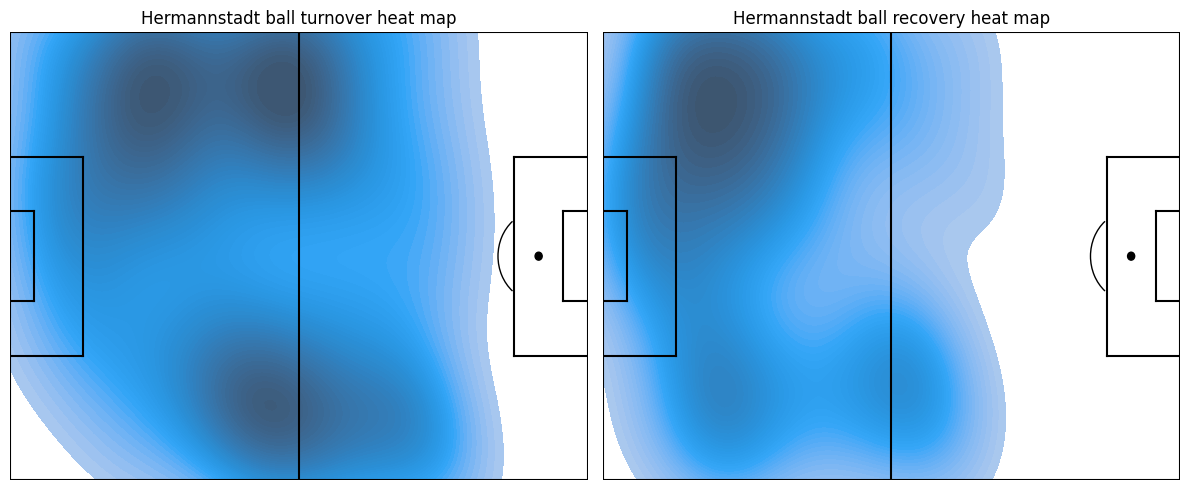

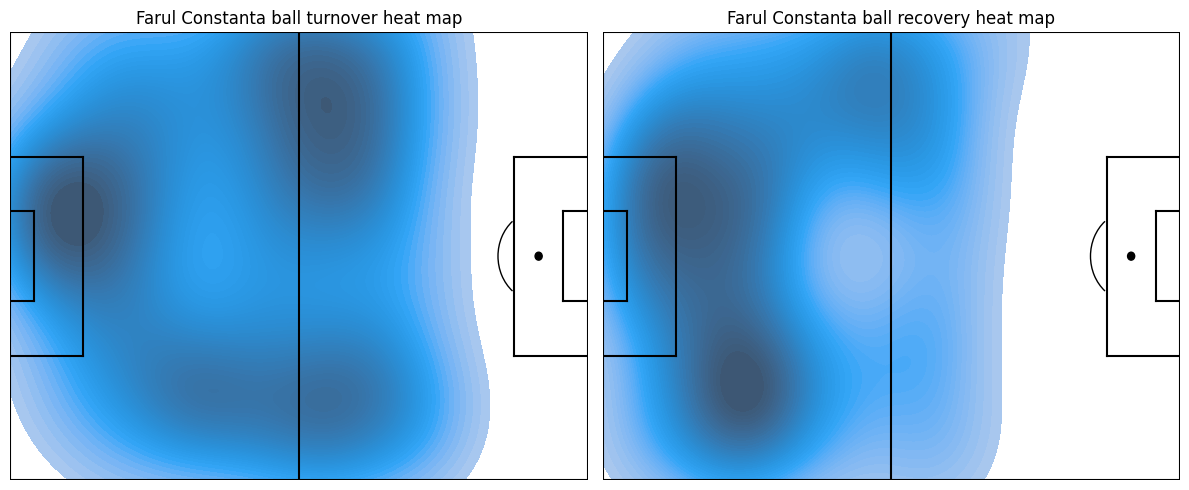

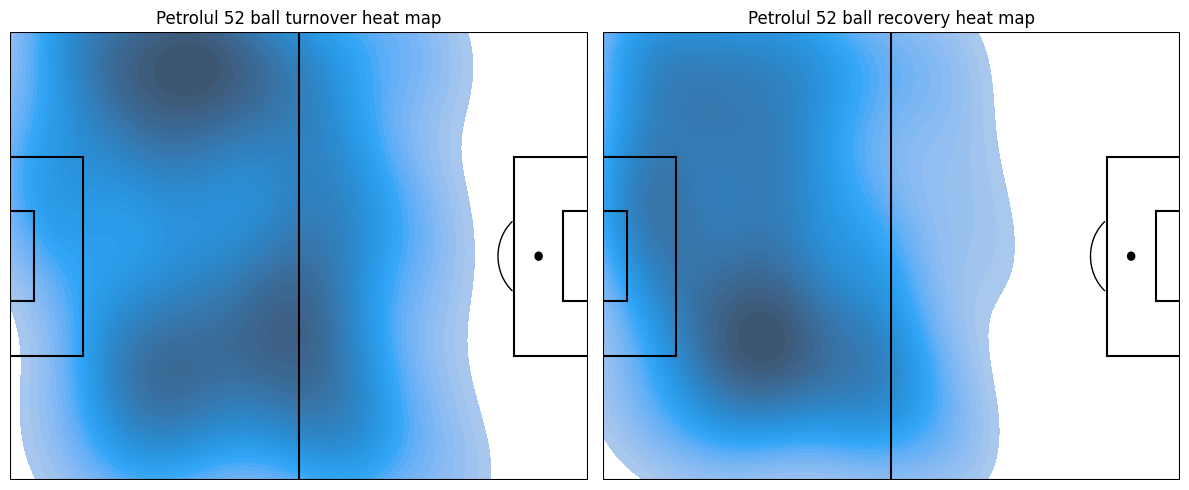

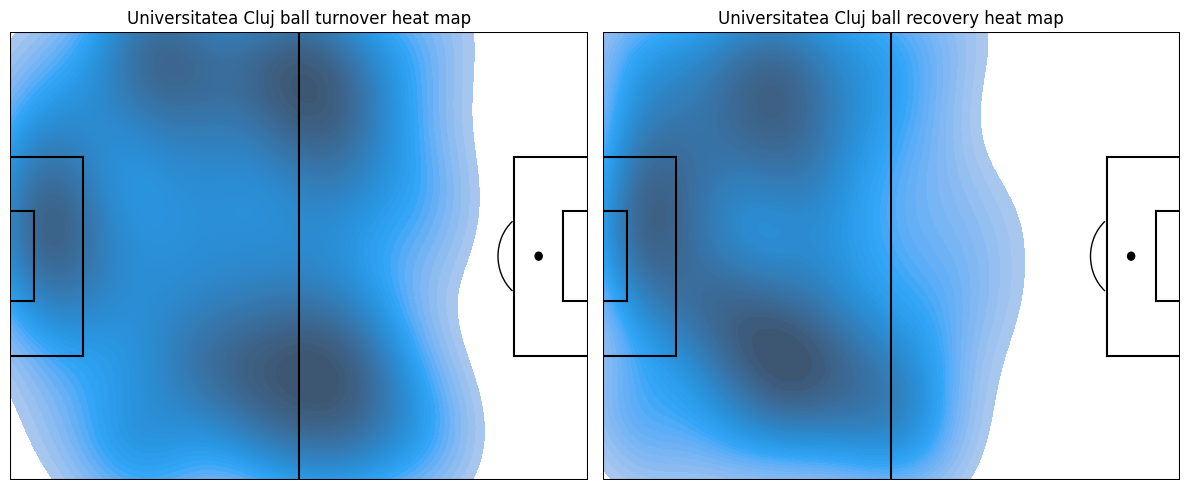

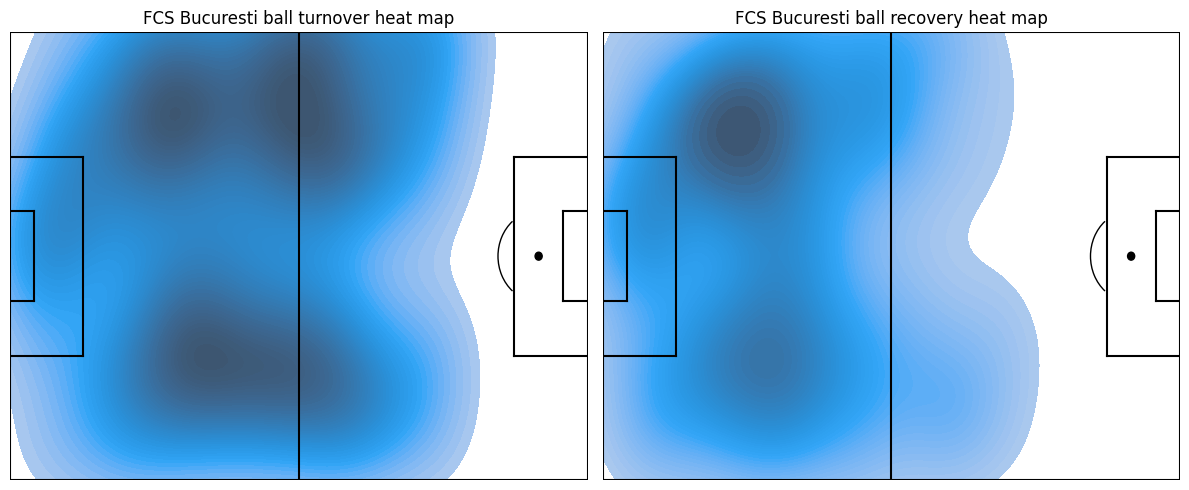

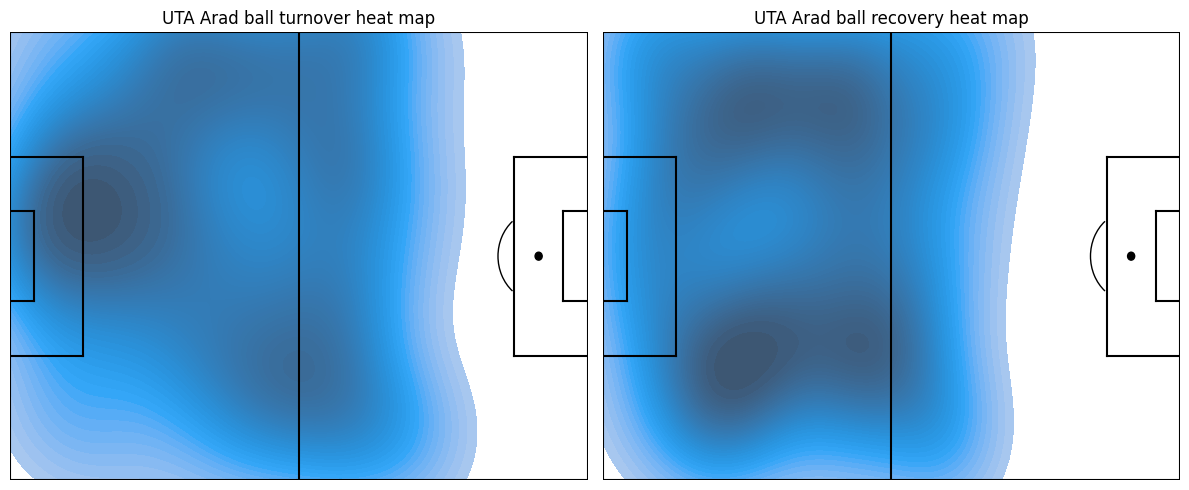

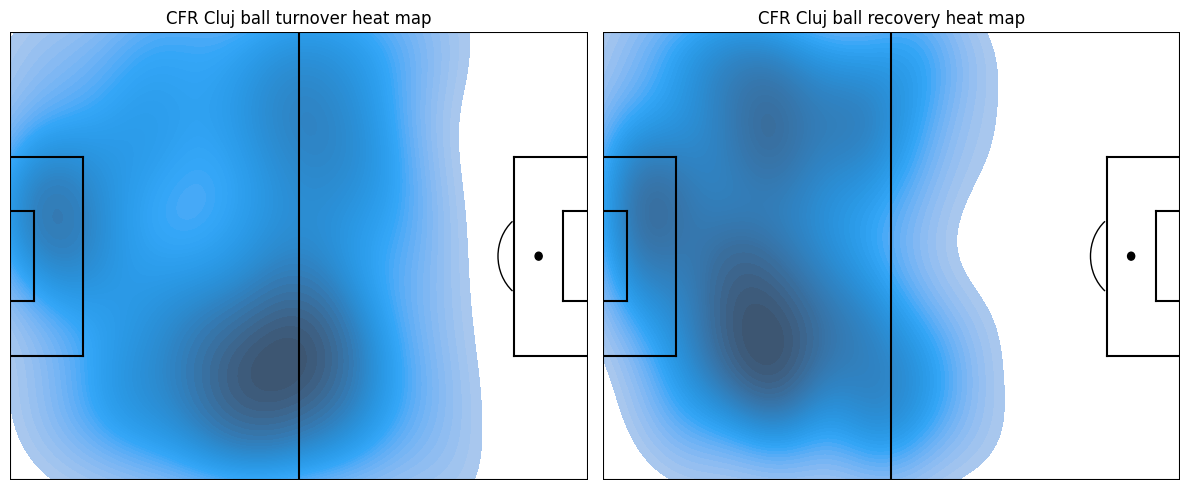

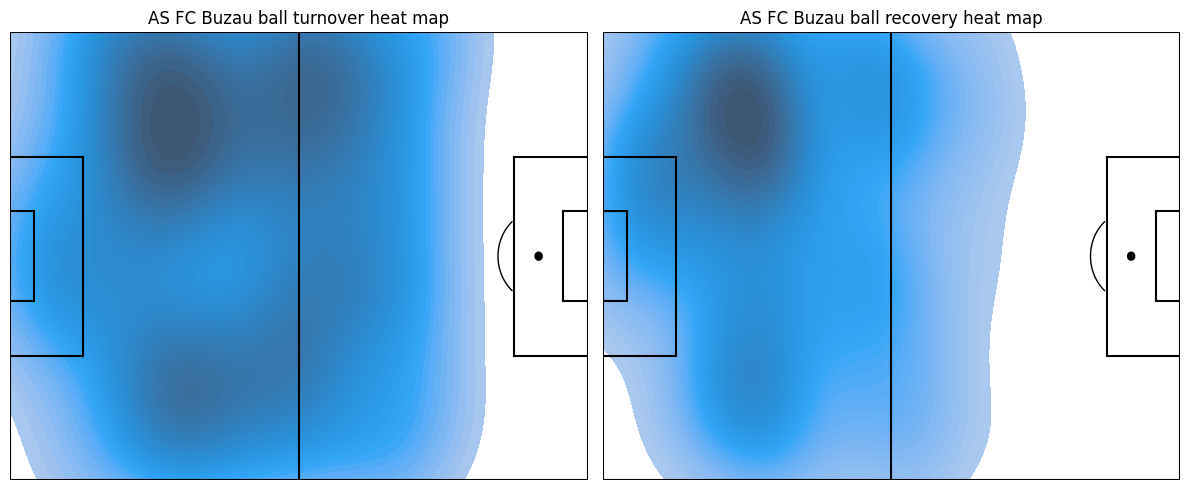

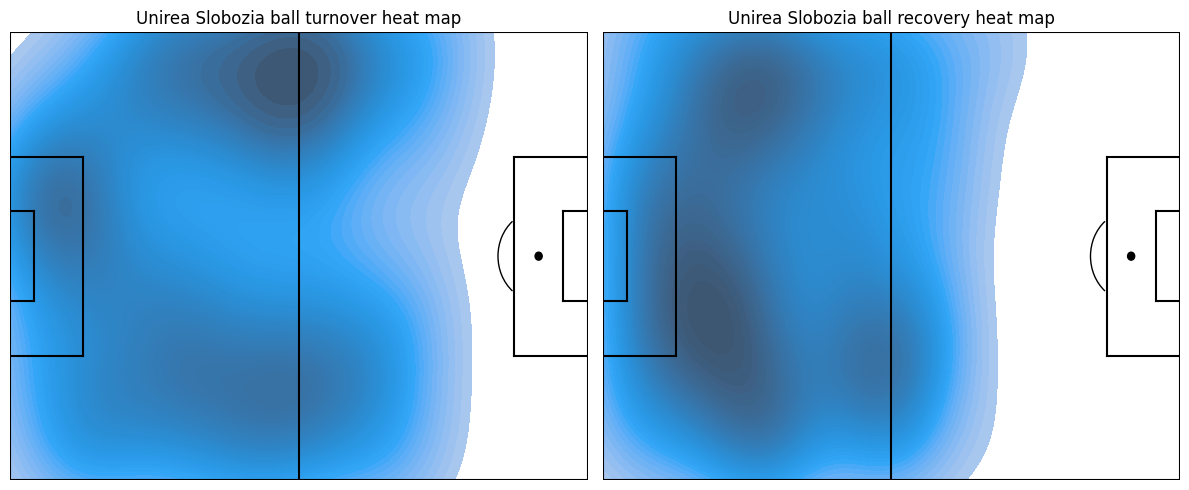

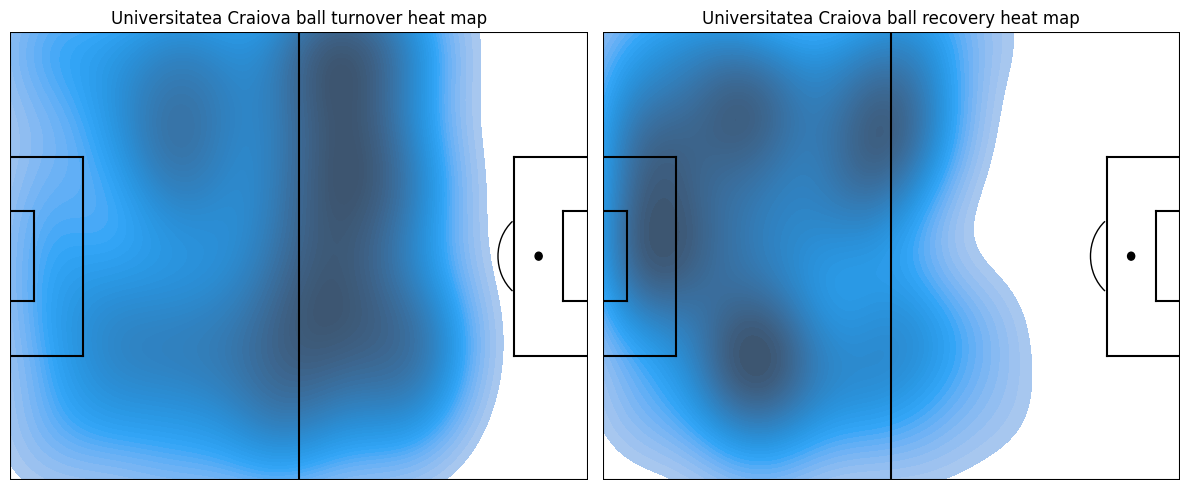

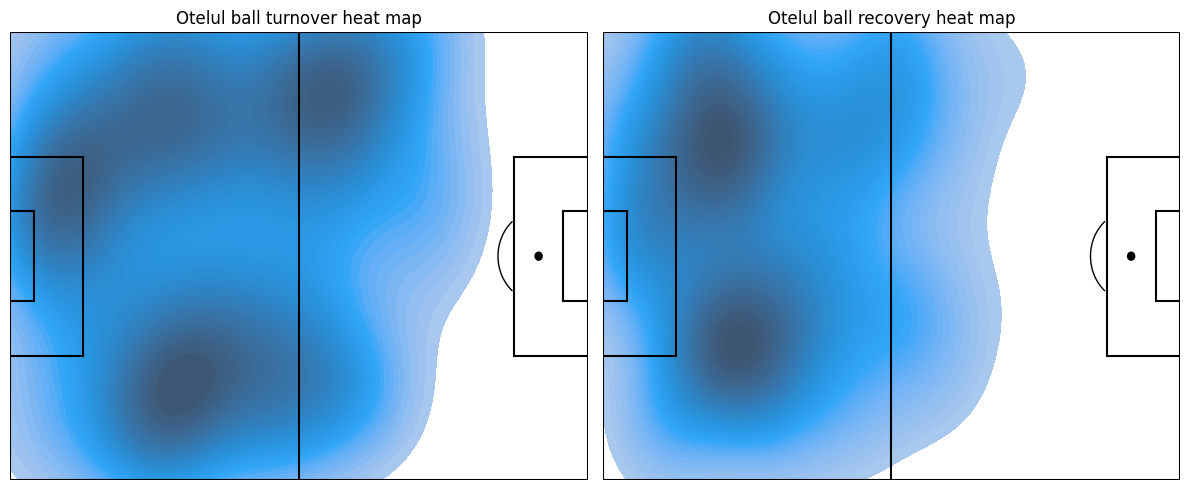

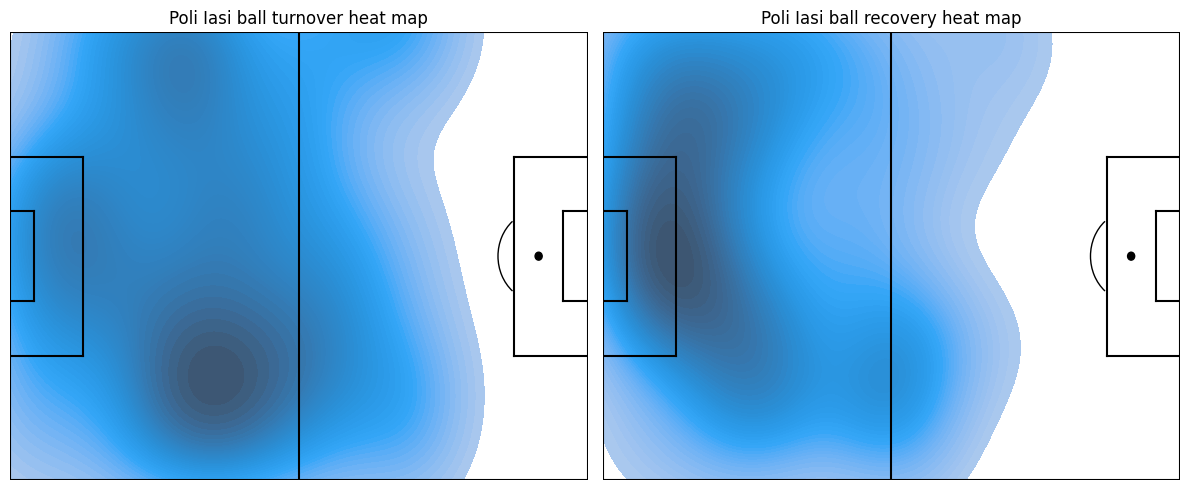

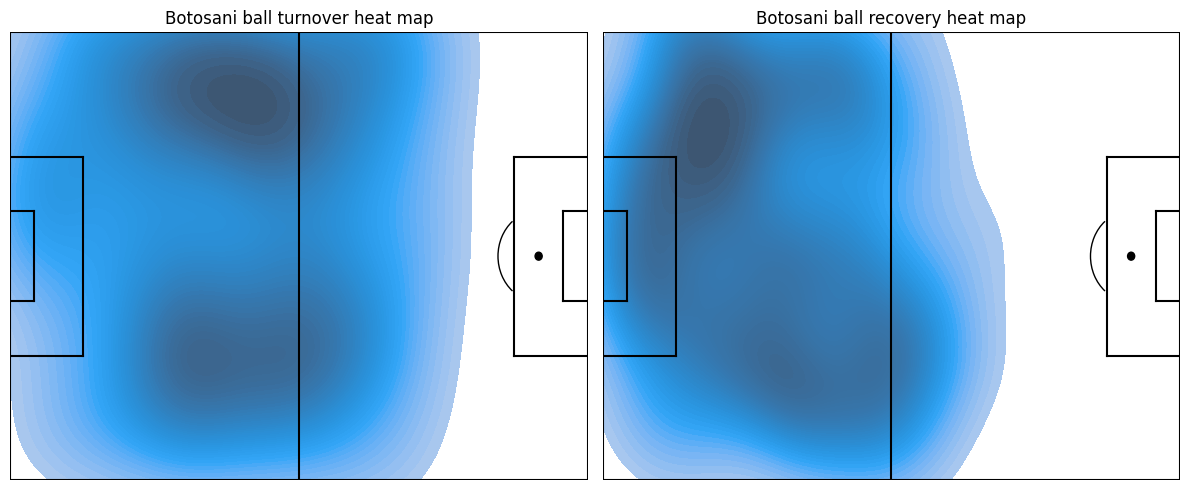

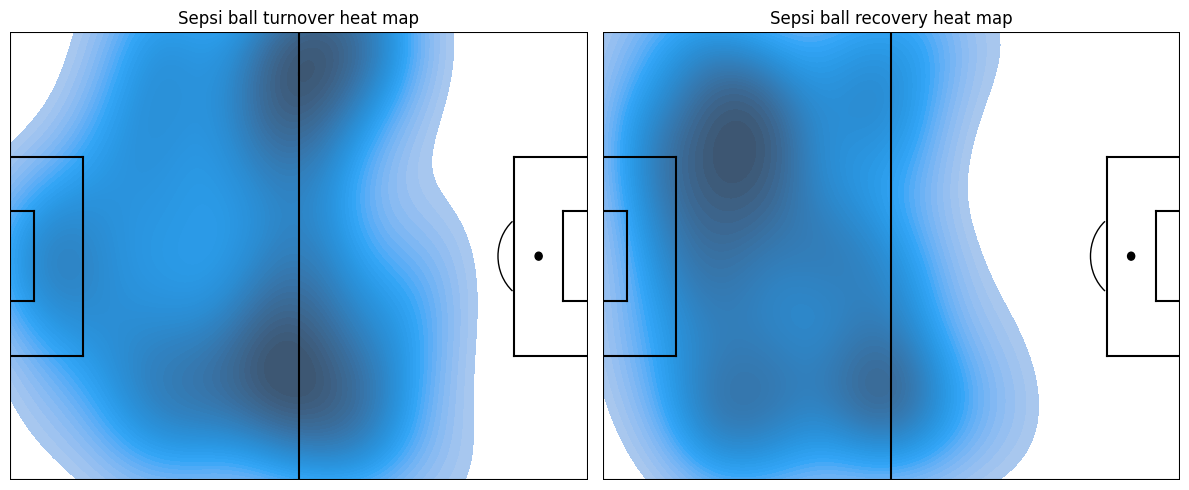

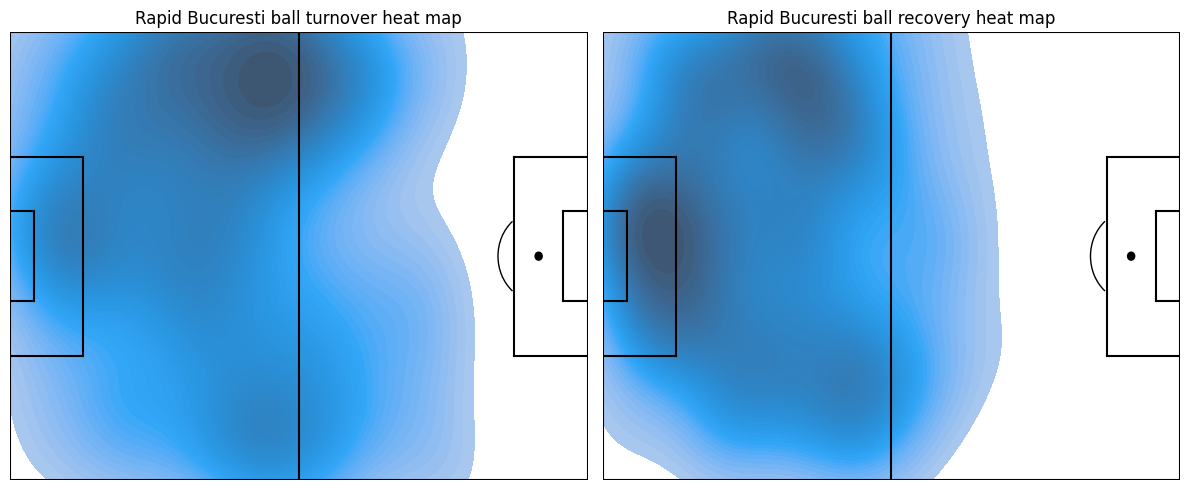

In [ ]:
for team_Name in allTeams:
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  axs[0].set_title(f'{team_Name} ball turnover heat map')
  axs[1].set_title(f'{team_Name} ball recovery heat map')

  X_loss, Y_loss, X_recovery, Y_recovery = get_Loss_Recovery_Coordinates(team_Name)

  plot_Loss_Recovery_HeatMap(axs[0])
  sns.kdeplot(x=X_loss, y=Y_loss, fill=True, n_levels=50, ax=axs[0])

  plot_Loss_Recovery_HeatMap(axs[1])
  sns.kdeplot(x=X_recovery, y=Y_recovery, fill=True, n_levels=50, ax=axs[1])

  plt.tight_layout()
  plt.show()

In [ ]:
filtered_Team_Stats = selectedStatsFeatures['team.name'] == 'FCS Bucuresti'

selectedStatsFeatures[filtered_Team_Stats]

,team.name,teamId,total.concededGoals,total.successfulDefensiveActions,total.losses,total.dangerousOwnHalfLosses,total.interceptions,total.recoveries,total.duels,total.pressingDuels,percent.defensiveDuelsWon,average.opponentOffsides,ownHalfLossRate,defensiveErrorRates,interceptionRecoveryRate,pressingIntensityRate,teamProfiles
1,FCS Bucuresti,11565,32,3859,4559,179,1440,3484,8376,537,25.1,0.98,3.93,0.008292,41.33,6.41,This team is not defensive error prone. They h...
